## Phase 1: Clean up of CRDC data files

In [1]:
import pandas
pandas.__version__
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cd /Users/dansari/Documents/GitHub/Identifying-features-to-predict-high-school-assessment-proficiency/Phase1/Data/CRDC

/Users/dansari/Documents/GitHub/Identifying-features-to-predict-high-school-assessment-proficiency/Phase1/Data/CRDC


### Cleaning school characteristics file

In [3]:
Sch_char = pandas.read_csv("School Characteristics.csv",encoding='cp1252')
Sch_char.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,JJ,SCH_GRADE_PS,SCH_GRADE_KG,...,SCH_GRADE_UG,SCH_UGDETAIL_ES,SCH_UGDETAIL_MS,SCH_UGDETAIL_HS,SCH_STATUS_SPED,SCH_STATUS_MAGNET,SCH_STATUS_CHARTER,SCH_STATUS_ALT,SCH_MAGNETDETAIL,SCH_ALTFOCUS
0,AL,ALABAMA,0100002,Alabama Youth Services,1705,Wallace Sch - Mt Meigs Campus,010000201705,Yes,No,No,...,Yes,-9,-9,-9,No,No,No,No,-9,-9
1,AL,ALABAMA,0100002,Alabama Youth Services,1706,McNeel Sch - Vacca Campus,010000201706,Yes,No,No,...,Yes,-9,-9,-9,No,No,No,No,-9,-9
2,AL,ALABAMA,0100002,Alabama Youth Services,1876,Alabama Youth Services,010000201876,No,No,No,...,Yes,-9,-9,-9,No,No,No,No,-9,-9
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,Yes,No,No,...,No,-9,-9,-9,No,No,No,No,-9,-9
4,AL,ALABAMA,0100005,Albertville City,870,Albertville Middle School,010000500870,No,No,No,...,No,-9,-9,-9,No,No,No,No,-9,-9


In [4]:
Sch_char['SCHID'] = Sch_char['SCHID'].apply(lambda x: '{0:0>5}'.format(x))

In [5]:
Sch_char['LEAID'] = Sch_char['LEAID'].apply(lambda x: '{0:0>7}'.format(x))

In [6]:
Sch_char.columns

Index(['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'JJ', 'SCH_GRADE_PS', 'SCH_GRADE_KG', 'SCH_GRADE_G01',
       'SCH_GRADE_G02', 'SCH_GRADE_G03', 'SCH_GRADE_G04', 'SCH_GRADE_G05',
       'SCH_GRADE_G06', 'SCH_GRADE_G07', 'SCH_GRADE_G08', 'SCH_GRADE_G09',
       'SCH_GRADE_G10', 'SCH_GRADE_G11', 'SCH_GRADE_G12', 'SCH_GRADE_UG',
       'SCH_UGDETAIL_ES', 'SCH_UGDETAIL_MS', 'SCH_UGDETAIL_HS',
       'SCH_STATUS_SPED', 'SCH_STATUS_MAGNET', 'SCH_STATUS_CHARTER',
       'SCH_STATUS_ALT', 'SCH_MAGNETDETAIL', 'SCH_ALTFOCUS'],
      dtype='object')

In [7]:
Sch_char.drop(Sch_char.columns[[7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,30,31]], axis=1, inplace=True)

In [8]:
Sch_char.shape

(97632, 11)

In [9]:
#Sch_char.head()

In [10]:
cols = ['LEAID', 'SCHID']
Sch_char['NCESSCH'] = Sch_char[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

In [11]:
Sch_char['NCESSCH'].is_unique

True

In [12]:
Sch_char.rename(columns={'SCH_STATUS_SPED':'Special_ed_schl','SCH_STATUS_MAGNET':'Magnet_schl','SCH_STATUS_CHARTER':'Charter_Schl','SCH_STATUS_ALT':'Alternate_schl'}, inplace=True)

In [13]:
Sch_char.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,Special_ed_schl,Magnet_schl,Charter_Schl,Alternate_schl,NCESSCH
0,AL,ALABAMA,0100002,Alabama Youth Services,01705,Wallace Sch - Mt Meigs Campus,010000201705,No,No,No,No,010000201705
1,AL,ALABAMA,0100002,Alabama Youth Services,01706,McNeel Sch - Vacca Campus,010000201706,No,No,No,No,010000201706
2,AL,ALABAMA,0100002,Alabama Youth Services,01876,Alabama Youth Services,010000201876,No,No,No,No,010000201876
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,No,No,No,No,010000299995
4,AL,ALABAMA,0100005,Albertville City,00870,Albertville Middle School,010000500870,No,No,No,No,010000500870


In [14]:
count = Sch_char['Charter_Schl'].value_counts() 
print(count) 

No     90583
Yes     7049
Name: Charter_Schl, dtype: int64


In [15]:
Sch_char['Special_ed_schl_new'] = Sch_char['Special_ed_schl'].replace(['Yes','No'],['1','0'])

In [16]:
Sch_char['Magnet_schl_new'] = Sch_char['Magnet_schl'].replace(['Yes','No'],['1','0'])

In [17]:
Sch_char['Charter_Schl_new'] = Sch_char['Charter_Schl'].replace(['Yes','No'],['1','0'])

In [18]:
Sch_char['Alternate_schl_new'] = Sch_char['Alternate_schl'].replace(['Yes','No'],['1','0'])

In [19]:
Sch_char[['Special_ed_schl_new', 'Magnet_schl_new','Charter_Schl_new','Alternate_schl_new']] = Sch_char[['Special_ed_schl_new', 'Magnet_schl_new','Charter_Schl_new','Alternate_schl_new']].astype(int)

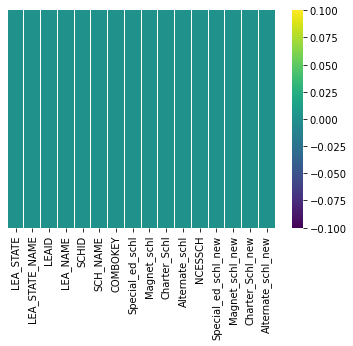

In [20]:
sns.heatmap(Sch_char.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [21]:
Sch_char.describe()

,Special_ed_schl_new,Magnet_schl_new,Charter_Schl_new,Alternate_schl_new
count,97632.000000,97632.000000,97632.00000,97632.000000
mean,0.022646,0.042230,0.07220,0.034241
std,0.148774,0.201115,0.25882,0.181848
min,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.00000,0.000000
75%,0.000000,0.000000,0.00000,0.000000
max,1.000000,1.000000,1.00000,1.000000


In [22]:
Sch_char.to_csv (r'/Users/dansari/Documents/GitHub/Identifying-features-to-predict-high-school-assessment-proficiency/Phase1/Data/CRDC/Clean_crdc_schlcharacteristics.csv', index = False, header=True)

### Cleaning school expenditure file

In [23]:
Sch_exp = pandas.read_csv("School Expenditures.csv", encoding='cp1252')
Sch_exp.tail()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,JJ,SCH_SAL_TOTPERS_WOFED,SCH_FTE_TEACH_WOFED,...,SCH_SAL_ADM_WOFED,SCH_SAL_TEACH_WFED,SCH_FTE_AID_WFED,SCH_SAL_AID_WFED,SCH_FTE_SUP_WFED,SCH_SAL_SUP_WFED,SCH_FTE_ADM_WFED,SCH_SAL_ADM_WFED,SCH_SAL_TOTPERS_WFED,SCH_NPE_WFED
97627,PR,PUERTO RICO,7200030,PUERTO RICO DEPARTMENT OF EDUCATION,2079,SEVERO E. COLBERG RAMIREZ,720003002079,No,0.0,0.0,...,-9.0,1373160.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97628,PR,PUERTO RICO,7200030,PUERTO RICO DEPARTMENT OF EDUCATION,2082,INTERMEDIA JUAN SERRALLES,720003002082,No,0.0,0.0,...,-9.0,676944.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97629,PR,PUERTO RICO,7200030,PUERTO RICO DEPARTMENT OF EDUCATION,2083,MARTIN GONZALEZ,720003002083,No,0.0,0.0,...,-9.0,393570.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97630,PR,PUERTO RICO,7200030,PUERTO RICO DEPARTMENT OF EDUCATION,2084,NEMESIO R. CANALES I,720003002084,No,0.0,0.0,...,-9.0,638940.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97631,PR,PUERTO RICO,7200030,PUERTO RICO DEPARTMENT OF EDUCATION,2085,JUAN QUIRINDONGO MORELL (SUPERIOR),720003002085,No,0.0,0.0,...,-9.0,941550.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
Sch_exp['SCHID'] = Sch_exp['SCHID'].apply(lambda x: '{0:0>5}'.format(x))

In [25]:
Sch_exp['LEAID'] = Sch_exp['LEAID'].apply(lambda x: '{0:0>7}'.format(x))

In [26]:
Sch_exp.columns

Index(['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'JJ', 'SCH_SAL_TOTPERS_WOFED', 'SCH_FTE_TEACH_WOFED',
       'SCH_SAL_TEACH_WOFED', 'SCH_NPE_WOFED', 'SCH_FTE_AID_WOFED',
       'SCH_SAL_AID_WOFED', 'SCH_FTE_SUP_WOFED', 'SCH_SAL_SUP_WOFED',
       'SCH_FTE_ADM_WOFED', 'SCH_SAL_ADM_WOFED', 'SCH_SAL_TEACH_WFED',
       'SCH_FTE_AID_WFED', 'SCH_SAL_AID_WFED', 'SCH_FTE_SUP_WFED',
       'SCH_SAL_SUP_WFED', 'SCH_FTE_ADM_WFED', 'SCH_SAL_ADM_WFED',
       'SCH_SAL_TOTPERS_WFED', 'SCH_NPE_WFED'],
      dtype='object')

In [27]:
Sch_exp.drop(Sch_exp.columns[[7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]], axis=1, inplace=True)

In [28]:
Sch_exp.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,SCH_FTE_TEACH_WOFED,SCH_SAL_TEACH_WOFED
0,AL,ALABAMA,0100002,Alabama Youth Services,01705,Wallace Sch - Mt Meigs Campus,010000201705,25.00,1827143.00
1,AL,ALABAMA,0100002,Alabama Youth Services,01706,McNeel Sch - Vacca Campus,010000201706,16.00,1305463.00
2,AL,ALABAMA,0100002,Alabama Youth Services,01876,Alabama Youth Services,010000201876,60.00,3400850.00
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,3.00,305220.00
4,AL,ALABAMA,0100005,Albertville City,00870,Albertville Middle School,010000500870,38.29,1782926.22


In [29]:
cols = ['LEAID', 'SCHID']
Sch_exp['NCESSCH'] = Sch_exp[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

In [30]:
Sch_exp.shape

(97632, 10)

In [31]:
Sch_exp['NCESSCH'].is_unique

True

In [32]:
Sch_exp.rename(columns={'SCH_FTE_TEACH_WOFED':'FTE_teachers_count','SCH_SAL_TEACH_WOFED':'SalaryforTeachers'}, inplace=True)

In [33]:
Sch_exp.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,FTE_teachers_count,SalaryforTeachers,NCESSCH
0,AL,ALABAMA,0100002,Alabama Youth Services,01705,Wallace Sch - Mt Meigs Campus,010000201705,25.00,1827143.00,010000201705
1,AL,ALABAMA,0100002,Alabama Youth Services,01706,McNeel Sch - Vacca Campus,010000201706,16.00,1305463.00,010000201706
2,AL,ALABAMA,0100002,Alabama Youth Services,01876,Alabama Youth Services,010000201876,60.00,3400850.00,010000201876
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,3.00,305220.00,010000299995
4,AL,ALABAMA,0100005,Albertville City,00870,Albertville Middle School,010000500870,38.29,1782926.22,010000500870


In [34]:
#Sch_exp['Teacher_salary_ratio'] = (Sch_exp['SalaryforTeachers'] / Sch_exp['FTE_teachers_count'])

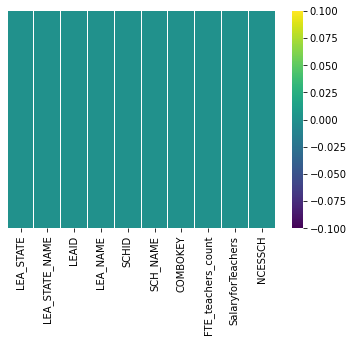

In [35]:
sns.heatmap(Sch_exp.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [36]:
Sch_exp.describe()

,FTE_teachers_count,SalaryforTeachers
count,9.763200e+04,9.763200e+04
mean,6.873048e+01,1.816205e+06
std,9.405691e+03,1.713907e+06
min,-9.000000e+00,-9.000000e+00
25%,1.500000e+01,7.903983e+05
50%,2.560000e+01,1.469219e+06
75%,3.810000e+01,2.307242e+06
max,2.840644e+06,3.126824e+07


#### Dropping columns with zero or less than zero Salary expenditures

In [37]:
Sch_exp_clean= Sch_exp[Sch_exp.SalaryforTeachers > 0]

In [38]:
Sch_exp_clean.shape

(92994, 10)

In [39]:
Sch_exp_clean.describe()

,FTE_teachers_count,SalaryforTeachers
count,9.299400e+04,9.299400e+04
mean,7.234228e+01,1.906787e+06
std,9.637376e+03,1.706241e+06
min,0.000000e+00,1.000000e-02
25%,1.686000e+01,8.982140e+05
50%,2.650000e+01,1.532901e+06
75%,3.900000e+01,2.364353e+06
max,2.840644e+06,3.126824e+07


In [40]:
Sch_exp_clean.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,FTE_teachers_count,SalaryforTeachers,NCESSCH
0,AL,ALABAMA,0100002,Alabama Youth Services,01705,Wallace Sch - Mt Meigs Campus,010000201705,25.00,1827143.00,010000201705
1,AL,ALABAMA,0100002,Alabama Youth Services,01706,McNeel Sch - Vacca Campus,010000201706,16.00,1305463.00,010000201706
2,AL,ALABAMA,0100002,Alabama Youth Services,01876,Alabama Youth Services,010000201876,60.00,3400850.00,010000201876
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,3.00,305220.00,010000299995
4,AL,ALABAMA,0100005,Albertville City,00870,Albertville Middle School,010000500870,38.29,1782926.22,010000500870


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ef6b73b50>,
      dtype=object)

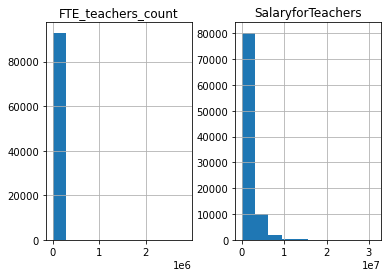

In [41]:
Sch_exp_clean.hist()

In [42]:
Sch_exp_clean.to_csv (r'/Users/dansari/Documents/GitHub/Identifying-features-to-predict-high-school-assessment-proficiency/Phase1/Data/CRDC/Clean_crdc_schlexpenses.csv', index = False, header=True)

### Cleaning school support file

In [43]:
Sch_sup= pandas.read_csv("School Support.csv",encoding='cp1252')
Sch_sup.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,JJ,SCH_FTETEACH_TOT,SCH_FTETEACH_CERT,...,SCH_FTETEACH_SY,SCH_TEACHERS_CURR_TOT,SCH_TEACHERS_PREV_TOT,SCH_FTETEACH_ABSENT,SCH_FTECOUNSELORS,SCH_FTESECURITY_LEO,SCH_FTESECURITY_GUA,SCH_FTESERVICES_NUR,SCH_FTESERVICES_PSY,SCH_FTESERVICES_SOC
0,AL,ALABAMA,0100002,Alabama Youth Services,1705,Wallace Sch - Mt Meigs Campus,010000201705,Yes,25.00,25.00,...,1.0,25.0,25.0,2.0,1.0,0.0,-9.0,0.0,0.0,0.0
1,AL,ALABAMA,0100002,Alabama Youth Services,1706,McNeel Sch - Vacca Campus,010000201706,Yes,16.00,16.00,...,0.0,0.0,0.0,3.0,1.0,0.0,-9.0,0.0,0.0,0.0
2,AL,ALABAMA,0100002,Alabama Youth Services,1876,Alabama Youth Services,010000201876,No,11.00,11.00,...,0.0,11.0,11.0,2.0,1.0,0.0,3.0,0.0,0.0,0.0
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,Yes,3.00,3.00,...,0.0,3.0,3.0,2.0,0.0,0.0,-9.0,0.0,0.0,0.0
4,AL,ALABAMA,0100005,Albertville City,870,Albertville Middle School,010000500870,No,39.29,39.29,...,3.0,39.0,39.0,8.0,2.0,1.0,0.0,1.0,0.0,0.0


In [44]:
Sch_sup['SCHID'] = Sch_sup['SCHID'].apply(lambda x: '{0:0>5}'.format(x))

In [45]:
Sch_sup['LEAID'] = Sch_sup['LEAID'].apply(lambda x: '{0:0>7}'.format(x))

In [46]:
Sch_sup.columns

Index(['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'JJ', 'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT',
       'SCH_FTETEACH_NOTCERT', 'SCH_FTETEACH_FY', 'SCH_FTETEACH_SY',
       'SCH_TEACHERS_CURR_TOT', 'SCH_TEACHERS_PREV_TOT', 'SCH_FTETEACH_ABSENT',
       'SCH_FTECOUNSELORS', 'SCH_FTESECURITY_LEO', 'SCH_FTESECURITY_GUA',
       'SCH_FTESERVICES_NUR', 'SCH_FTESERVICES_PSY', 'SCH_FTESERVICES_SOC'],
      dtype='object')

In [47]:
Sch_sup.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,JJ,SCH_FTETEACH_TOT,SCH_FTETEACH_CERT,...,SCH_FTETEACH_SY,SCH_TEACHERS_CURR_TOT,SCH_TEACHERS_PREV_TOT,SCH_FTETEACH_ABSENT,SCH_FTECOUNSELORS,SCH_FTESECURITY_LEO,SCH_FTESECURITY_GUA,SCH_FTESERVICES_NUR,SCH_FTESERVICES_PSY,SCH_FTESERVICES_SOC
0,AL,ALABAMA,0100002,Alabama Youth Services,01705,Wallace Sch - Mt Meigs Campus,010000201705,Yes,25.00,25.00,...,1.0,25.0,25.0,2.0,1.0,0.0,-9.0,0.0,0.0,0.0
1,AL,ALABAMA,0100002,Alabama Youth Services,01706,McNeel Sch - Vacca Campus,010000201706,Yes,16.00,16.00,...,0.0,0.0,0.0,3.0,1.0,0.0,-9.0,0.0,0.0,0.0
2,AL,ALABAMA,0100002,Alabama Youth Services,01876,Alabama Youth Services,010000201876,No,11.00,11.00,...,0.0,11.0,11.0,2.0,1.0,0.0,3.0,0.0,0.0,0.0
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,Yes,3.00,3.00,...,0.0,3.0,3.0,2.0,0.0,0.0,-9.0,0.0,0.0,0.0
4,AL,ALABAMA,0100005,Albertville City,00870,Albertville Middle School,010000500870,No,39.29,39.29,...,3.0,39.0,39.0,8.0,2.0,1.0,0.0,1.0,0.0,0.0


In [48]:
Sch_sup.drop(Sch_sup.columns[[7,11,12,13,14,15,16,17,18,19,20,21]], axis=1, inplace=True)

In [49]:
Sch_sup.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,SCH_FTETEACH_TOT,SCH_FTETEACH_CERT,SCH_FTETEACH_NOTCERT
0,AL,ALABAMA,0100002,Alabama Youth Services,01705,Wallace Sch - Mt Meigs Campus,010000201705,25.00,25.00,0.0
1,AL,ALABAMA,0100002,Alabama Youth Services,01706,McNeel Sch - Vacca Campus,010000201706,16.00,16.00,0.0
2,AL,ALABAMA,0100002,Alabama Youth Services,01876,Alabama Youth Services,010000201876,11.00,11.00,0.0
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,3.00,3.00,0.0
4,AL,ALABAMA,0100005,Albertville City,00870,Albertville Middle School,010000500870,39.29,39.29,0.0


In [50]:
cols = ['LEAID', 'SCHID']
Sch_sup['NCESSCH'] = Sch_sup[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

In [51]:
Sch_sup.shape

(97632, 11)

In [52]:
Sch_sup['NCESSCH'].is_unique

True

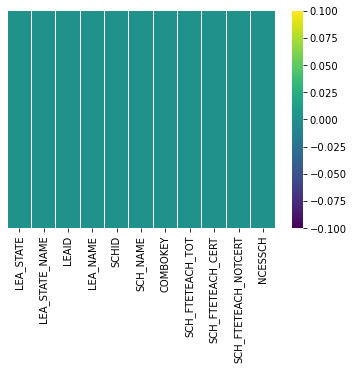

In [53]:
sns.heatmap(Sch_sup.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [54]:
Sch_sup.describe()

,SCH_FTETEACH_TOT,SCH_FTETEACH_CERT,SCH_FTETEACH_NOTCERT
count,97632.000000,97632.000000,97632.000000
mean,34.045934,32.962739,1.070287
std,26.406140,25.889269,3.814373
min,-6.000000,-6.000000,-6.000000
25%,18.000000,17.000000,0.000000
50%,29.000000,28.000000,0.000000
75%,43.000000,42.000000,0.180000
max,607.000000,499.000000,157.000000


#### Filtering FTE count GT 1 and Cert count GT -5

In [55]:
Sch_sup_FTEGT1= Sch_sup[Sch_sup.SCH_FTETEACH_TOT > 0]

In [56]:
Sch_sup_clean= Sch_sup_FTEGT1[Sch_sup_FTEGT1.SCH_FTETEACH_CERT > -5]

In [57]:
Sch_sup_clean.shape

(96854, 11)

In [58]:
Sch_sup_clean.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,SCH_FTETEACH_TOT,SCH_FTETEACH_CERT,SCH_FTETEACH_NOTCERT,NCESSCH
0,AL,ALABAMA,0100002,Alabama Youth Services,01705,Wallace Sch - Mt Meigs Campus,010000201705,25.00,25.00,0.0,010000201705
1,AL,ALABAMA,0100002,Alabama Youth Services,01706,McNeel Sch - Vacca Campus,010000201706,16.00,16.00,0.0,010000201706
2,AL,ALABAMA,0100002,Alabama Youth Services,01876,Alabama Youth Services,010000201876,11.00,11.00,0.0,010000201876
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,3.00,3.00,0.0,010000299995
4,AL,ALABAMA,0100005,Albertville City,00870,Albertville Middle School,010000500870,39.29,39.29,0.0,010000500870


In [59]:
Sch_sup_clean.describe()

,SCH_FTETEACH_TOT,SCH_FTETEACH_CERT,SCH_FTETEACH_NOTCERT
count,96854.000000,96854.000000,96854.000000
mean,34.320365,33.227343,1.080124
std,26.332913,25.819590,3.827211
min,0.010000,0.000000,0.000000
25%,18.000000,17.090000,0.000000
50%,29.000000,28.300000,0.000000
75%,43.000000,42.000000,0.300000
max,607.000000,499.000000,157.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ef6f73520>,
      dtype=object)

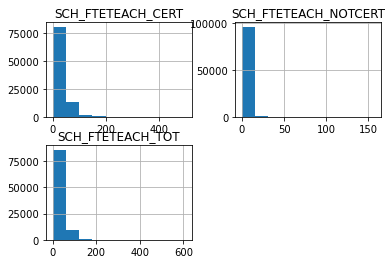

In [60]:
Sch_sup_clean.hist()

In [61]:
Sch_sup_clean.to_csv (r'/Users/dansari/Documents/GitHub/Identifying-features-to-predict-high-school-assessment-proficiency/Phase1/Data/CRDC/Clean_crdc_schlsupport.csv', index = False, header=True)

### Cleaning SAT and ACT file

In [62]:
SAT_ACT = pandas.read_csv("SAT and ACT.csv", encoding='cp1252')
SAT_ACT.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,JJ,SCH_SATACT_HI_M,SCH_SATACT_HI_F,...,SCH_SATACT_WH_M,SCH_SATACT_WH_F,SCH_SATACT_TR_M,SCH_SATACT_TR_F,TOT_SATACT_M,TOT_SATACT_F,SCH_SATACT_LEP_M,SCH_SATACT_LEP_F,SCH_SATACT_IDEA_M,SCH_SATACT_IDEA_F
0,AL,ALABAMA,0100002,Alabama Youth Services,1705,Wallace Sch - Mt Meigs Campus,010000201705,Yes,0,0,...,7,0,0,0,18,0,0,0,0,0
1,AL,ALABAMA,0100002,Alabama Youth Services,1706,McNeel Sch - Vacca Campus,010000201706,Yes,0,0,...,6,0,0,0,10,0,0,0,0,0
2,AL,ALABAMA,0100002,Alabama Youth Services,1876,Alabama Youth Services,010000201876,No,0,0,...,1,0,0,0,2,0,0,0,0,0
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,Yes,0,0,...,1,0,0,0,3,0,0,0,0,0
4,AL,ALABAMA,0100005,Albertville City,870,Albertville Middle School,010000500870,No,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9


In [63]:
SAT_ACT['LEAID'] = SAT_ACT['LEAID'].apply(lambda x: '{0:0>7}'.format(x))

In [64]:
SAT_ACT['SCHID'] = SAT_ACT['SCHID'].apply(lambda x: '{0:0>5}'.format(x))

In [65]:
SAT_ACT.columns

Index(['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'JJ', 'SCH_SATACT_HI_M', 'SCH_SATACT_HI_F',
       'SCH_SATACT_AM_M', 'SCH_SATACT_AM_F', 'SCH_SATACT_AS_M',
       'SCH_SATACT_AS_F', 'SCH_SATACT_HP_M', 'SCH_SATACT_HP_F',
       'SCH_SATACT_BL_M', 'SCH_SATACT_BL_F', 'SCH_SATACT_WH_M',
       'SCH_SATACT_WH_F', 'SCH_SATACT_TR_M', 'SCH_SATACT_TR_F', 'TOT_SATACT_M',
       'TOT_SATACT_F', 'SCH_SATACT_LEP_M', 'SCH_SATACT_LEP_F',
       'SCH_SATACT_IDEA_M', 'SCH_SATACT_IDEA_F'],
      dtype='object')

In [66]:
SAT_ACT.shape

(97632, 28)

In [67]:
SAT_ACT.drop(SAT_ACT.columns[[7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,24,25,26,27]], axis=1, inplace=True)

In [68]:
SAT_ACT.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,TOT_SATACT_M,TOT_SATACT_F
0,AL,ALABAMA,0100002,Alabama Youth Services,01705,Wallace Sch - Mt Meigs Campus,010000201705,18,0
1,AL,ALABAMA,0100002,Alabama Youth Services,01706,McNeel Sch - Vacca Campus,010000201706,10,0
2,AL,ALABAMA,0100002,Alabama Youth Services,01876,Alabama Youth Services,010000201876,2,0
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,3,0
4,AL,ALABAMA,0100005,Albertville City,00870,Albertville Middle School,010000500870,-9,-9


In [69]:
cols = ['LEAID', 'SCHID']
SAT_ACT['NCESSCH'] = SAT_ACT[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

#### Adding total count of male and female participation on ACT and SAT

In [70]:
SAT_ACT.rename(columns={'TOT_SATACT_M':'Male_part_count','TOT_SATACT_F':'Female_part_count'}, inplace=True)

In [71]:
SAT_ACT['Total_SAT_ACT_students'] = (SAT_ACT['Male_part_count'] + SAT_ACT['Female_part_count'])

In [72]:
SAT_ACT.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,Male_part_count,Female_part_count,NCESSCH,Total_SAT_ACT_students
0,AL,ALABAMA,0100002,Alabama Youth Services,01705,Wallace Sch - Mt Meigs Campus,010000201705,18,0,010000201705,18
1,AL,ALABAMA,0100002,Alabama Youth Services,01706,McNeel Sch - Vacca Campus,010000201706,10,0,010000201706,10
2,AL,ALABAMA,0100002,Alabama Youth Services,01876,Alabama Youth Services,010000201876,2,0,010000201876,2
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,3,0,010000299995,3
4,AL,ALABAMA,0100005,Albertville City,00870,Albertville Middle School,010000500870,-9,-9,010000500870,-18


In [73]:
SAT_ACT.describe()

,Male_part_count,Female_part_count,Total_SAT_ACT_students
count,97632.000000,97632.000000,97632.000000
mean,11.282950,13.440306,24.723257
std,62.969086,68.903726,131.282228
min,-9.000000,-9.000000,-18.000000
25%,-9.000000,-9.000000,-18.000000
50%,-9.000000,-9.000000,-18.000000
75%,0.000000,0.000000,0.000000
max,1454.000000,1334.000000,2788.000000


#### Keeping total counts GT 0

In [74]:
SAT_ACT_clean= SAT_ACT[SAT_ACT.Total_SAT_ACT_students > 0]

In [75]:
SAT_ACT_clean.shape

(20586, 11)

In [76]:
SAT_ACT_clean.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,Male_part_count,Female_part_count,NCESSCH,Total_SAT_ACT_students
0,AL,ALABAMA,0100002,Alabama Youth Services,01705,Wallace Sch - Mt Meigs Campus,010000201705,18,0,010000201705,18
1,AL,ALABAMA,0100002,Alabama Youth Services,01706,McNeel Sch - Vacca Campus,010000201706,10,0,010000201706,10
2,AL,ALABAMA,0100002,Alabama Youth Services,01876,Alabama Youth Services,010000201876,2,0,010000201876,2
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,3,0,010000299995,3
5,AL,ALABAMA,0100005,Albertville City,00871,Albertville High School,010000500871,177,186,010000500871,363


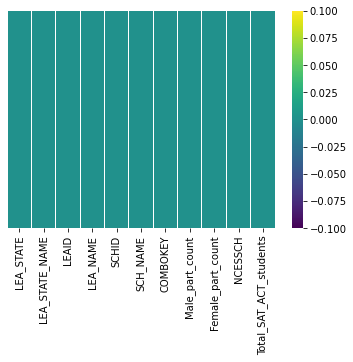

In [77]:
sns.heatmap(SAT_ACT.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [78]:
SAT_ACT_clean.describe()

,Male_part_count,Female_part_count,Total_SAT_ACT_students
count,20586.000000,20586.000000,20586.000000
mean,83.630477,93.862042,177.492519
std,110.200304,119.552411,228.149599
min,0.000000,0.000000,1.000000
25%,12.000000,14.000000,26.000000
50%,41.000000,47.000000,89.000000
75%,113.000000,131.000000,243.000000
max,1454.000000,1334.000000,2788.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ef6f77850>,
      dtype=object)

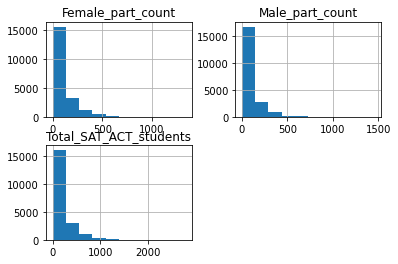

In [79]:
SAT_ACT_clean.hist()

In [80]:
SAT_ACT_clean.to_csv (r'/Users/dansari/Documents/GitHub/Identifying-features-to-predict-high-school-assessment-proficiency/Phase1/Data/CRDC/Clean_crdc_SAT_ACT.csv', index = False, header=True)

### Cleaning IB file

In [81]:
IB= pandas.read_csv("International Baccalaureate.csv",encoding='cp1252')
IB.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,JJ,SCH_IBENR_IND,SCH_IBENR_HI_M,...,SCH_IBENR_WH_M,SCH_IBENR_WH_F,SCH_IBENR_TR_M,SCH_IBENR_TR_F,TOT_IBENR_M,TOT_IBENR_F,SCH_IBENR_LEP_M,SCH_IBENR_LEP_F,SCH_IBENR_IDEA_M,SCH_IBENR_IDEA_F
0,AL,ALABAMA,0100002,Alabama Youth Services,1705,Wallace Sch - Mt Meigs Campus,010000201705,Yes,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
1,AL,ALABAMA,0100002,Alabama Youth Services,1706,McNeel Sch - Vacca Campus,010000201706,Yes,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
2,AL,ALABAMA,0100002,Alabama Youth Services,1876,Alabama Youth Services,010000201876,No,No,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,Yes,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
4,AL,ALABAMA,0100005,Albertville City,870,Albertville Middle School,010000500870,No,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9


In [82]:
IB['SCHID'] = IB['SCHID'].apply(lambda x: '{0:0>5}'.format(x))

In [83]:
IB['LEAID'] = IB['LEAID'].apply(lambda x: '{0:0>7}'.format(x))

In [84]:
IB.columns

Index(['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'JJ', 'SCH_IBENR_IND', 'SCH_IBENR_HI_M', 'SCH_IBENR_HI_F',
       'SCH_IBENR_AM_M', 'SCH_IBENR_AM_F', 'SCH_IBENR_AS_M', 'SCH_IBENR_AS_F',
       'SCH_IBENR_HP_M', 'SCH_IBENR_HP_F', 'SCH_IBENR_BL_M', 'SCH_IBENR_BL_F',
       'SCH_IBENR_WH_M', 'SCH_IBENR_WH_F', 'SCH_IBENR_TR_M', 'SCH_IBENR_TR_F',
       'TOT_IBENR_M', 'TOT_IBENR_F', 'SCH_IBENR_LEP_M', 'SCH_IBENR_LEP_F',
       'SCH_IBENR_IDEA_M', 'SCH_IBENR_IDEA_F'],
      dtype='object')

In [85]:
IB.shape

(97632, 29)

In [86]:
IB.drop(IB.columns[[7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,25,26,27,28]], axis=1, inplace=True)

In [87]:
IB.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,SCH_IBENR_IND,TOT_IBENR_M,TOT_IBENR_F
0,AL,ALABAMA,0100002,Alabama Youth Services,01705,Wallace Sch - Mt Meigs Campus,010000201705,-9,-9,-9
1,AL,ALABAMA,0100002,Alabama Youth Services,01706,McNeel Sch - Vacca Campus,010000201706,-9,-9,-9
2,AL,ALABAMA,0100002,Alabama Youth Services,01876,Alabama Youth Services,010000201876,No,-9,-9
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,-9,-9,-9
4,AL,ALABAMA,0100005,Albertville City,00870,Albertville Middle School,010000500870,-9,-9,-9


In [88]:
cols = ['LEAID', 'SCHID']
IB['NCESSCH'] = IB[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

In [89]:
IB.rename(columns={'TOT_IBENR_M':'Male_enroll_count','TOT_IBENR_F':'Female_enroll_count'}, inplace=True)

In [90]:
IB['Total_IB_students'] = (IB['Male_enroll_count'] + IB['Female_enroll_count'])

#### Keeping IB program indicator with Y/N

In [91]:
IB_clean= IB[IB.SCH_IBENR_IND != '-9']

In [92]:
IB_clean.shape

(28152, 12)

In [93]:
IB_clean.dtypes

LEA_STATE              object
LEA_STATE_NAME         object
LEAID                  object
LEA_NAME               object
SCHID                  object
SCH_NAME               object
COMBOKEY               object
SCH_IBENR_IND          object
Male_enroll_count       int64
Female_enroll_count     int64
NCESSCH                object
Total_IB_students       int64
dtype: object

In [94]:
IB_clean['SCH_IBENR_IND_new'] = IB_clean['SCH_IBENR_IND'].replace(['Yes','No'],['1','0'])

<ipython-input-94-8edd4897e268>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IB_clean['SCH_IBENR_IND_new'] = IB_clean['SCH_IBENR_IND'].replace(['Yes','No'],['1','0'])


In [95]:
IB_clean[['SCH_IBENR_IND_new']]=IB_clean[['SCH_IBENR_IND_new']].astype(int)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [96]:
IB_clean.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,SCH_IBENR_IND,Male_enroll_count,Female_enroll_count,NCESSCH,Total_IB_students,SCH_IBENR_IND_new
2,AL,ALABAMA,0100002,Alabama Youth Services,01876,Alabama Youth Services,010000201876,No,-9,-9,010000201876,-18,0
5,AL,ALABAMA,0100005,Albertville City,00871,Albertville High School,010000500871,No,-9,-9,010000500871,-18,0
11,AL,ALABAMA,0100006,Marshall County,00872,Asbury High School,010000600872,No,-9,-9,010000600872,-18,0
14,AL,ALABAMA,0100006,Marshall County,00878,Douglas High School,010000600878,No,-9,-9,010000600878,-18,0
16,AL,ALABAMA,0100006,Marshall County,00883,Kate D Smith DAR High School,010000600883,No,-9,-9,010000600883,-18,0


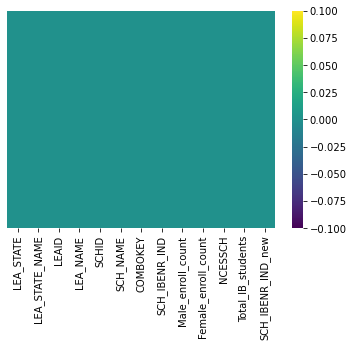

In [97]:
sns.heatmap(IB_clean.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [98]:
IB_clean.describe()

,Male_enroll_count,Female_enroll_count,Total_IB_students,SCH_IBENR_IND_new
count,28152.000000,28152.000000,28152.000000,28152.000000
mean,-6.026996,-5.133774,-11.160770,0.032538
std,23.675975,29.273772,52.639548,0.201606
min,-9.000000,-9.000000,-18.000000,-6.000000
25%,-9.000000,-9.000000,-18.000000,0.000000
50%,-9.000000,-9.000000,-18.000000,0.000000
75%,-9.000000,-9.000000,-18.000000,0.000000
max,688.000000,783.000000,1335.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ef6d1cf10>,
      dtype=object)

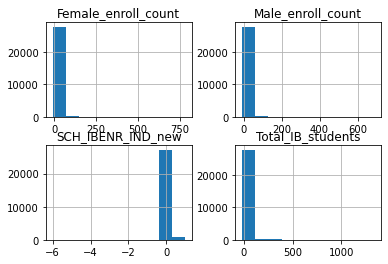

In [99]:
IB_clean.hist()

In [100]:
IB_clean.to_csv (r'/Users/dansari/Documents/GitHub/Identifying-features-to-predict-high-school-assessment-proficiency/Phase1/Data/CRDC/Clean_crdc_IB.csv', index = False, header=True)

### Cleaning AP file

In [101]:
AP = pandas.read_csv("Advanced Placement.csv",encoding='cp1252')
AP.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,JJ,SCH_APENR_IND,SCH_APCOURSES,...,SCH_APEXAM_NONE_WH_M,SCH_APEXAM_NONE_WH_F,SCH_APEXAM_NONE_TR_M,SCH_APEXAM_NONE_TR_F,TOT_APEXAM_NONE_M,TOT_APEXAM_NONE_F,SCH_APEXAM_NONE_LEP_M,SCH_APEXAM_NONE_LEP_F,SCH_APEXAM_NONE_IDEA_M,SCH_APEXAM_NONE_IDEA_F
0,AL,ALABAMA,100002,Alabama Youth Services,1705,Wallace Sch - Mt Meigs Campus,10000201705,Yes,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
1,AL,ALABAMA,100002,Alabama Youth Services,1706,McNeel Sch - Vacca Campus,10000201706,Yes,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
2,AL,ALABAMA,100002,Alabama Youth Services,1876,Alabama Youth Services,10000201876,No,No,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
3,AL,ALABAMA,100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,10000299995,Yes,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
4,AL,ALABAMA,100005,Albertville City,870,Albertville Middle School,10000500870,No,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9


In [102]:
AP['SCHID'] = AP['SCHID'].apply(lambda x: '{0:0>5}'.format(x))

In [103]:
AP['LEAID'] = AP['LEAID'].apply(lambda x: '{0:0>7}'.format(x))

In [104]:
AP.columns

Index(['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'JJ', 'SCH_APENR_IND', 'SCH_APCOURSES',
       ...
       'SCH_APEXAM_NONE_WH_M', 'SCH_APEXAM_NONE_WH_F', 'SCH_APEXAM_NONE_TR_M',
       'SCH_APEXAM_NONE_TR_F', 'TOT_APEXAM_NONE_M', 'TOT_APEXAM_NONE_F',
       'SCH_APEXAM_NONE_LEP_M', 'SCH_APEXAM_NONE_LEP_F',
       'SCH_APEXAM_NONE_IDEA_M', 'SCH_APEXAM_NONE_IDEA_F'],
      dtype='object', length=134)

In [105]:
AP.shape

(97632, 134)

In [106]:
AP=AP[['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME','COMBOKEY','SCH_APENR_IND','SCH_APCOURSES','SCH_APMATHENR_IND','TOT_APMATHENR_M','TOT_APMATHENR_F','SCH_APOTHENR_IND','TOT_APOTHENR_M','TOT_APOTHENR_F','TOT_APEXAM_ONEORMORE_M','TOT_APEXAM_ONEORMORE_F']]

In [107]:
AP.shape

(97632, 17)

In [108]:
AP.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,SCH_APENR_IND,SCH_APCOURSES,SCH_APMATHENR_IND,TOT_APMATHENR_M,TOT_APMATHENR_F,SCH_APOTHENR_IND,TOT_APOTHENR_M,TOT_APOTHENR_F,TOT_APEXAM_ONEORMORE_M,TOT_APEXAM_ONEORMORE_F
0,AL,ALABAMA,0100002,Alabama Youth Services,01705,Wallace Sch - Mt Meigs Campus,10000201705,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
1,AL,ALABAMA,0100002,Alabama Youth Services,01706,McNeel Sch - Vacca Campus,10000201706,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
2,AL,ALABAMA,0100002,Alabama Youth Services,01876,Alabama Youth Services,10000201876,No,-9,-9,-9,-9,-9,-9,-9,-9,-9
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,10000299995,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
4,AL,ALABAMA,0100005,Albertville City,00870,Albertville Middle School,10000500870,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9


In [109]:
cols = ['LEAID', 'SCHID']
AP['NCESSCH'] = AP[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

In [110]:
AP.rename(columns={'TOT_APMATHENR_M':'Male_enroll_math_count','TOT_APMATHENR_F':'Female_enroll_math_count','TOT_APOTHENR_M':'Male_enroll_other_count','TOT_APOTHENR_F':'Female_enroll_other_count'}, inplace=True)

In [111]:
AP['Total_AP_math_students'] = (AP['Male_enroll_math_count'] + AP['Female_enroll_math_count'])

In [112]:
AP['Total_AP_other_students'] = (AP['Male_enroll_other_count'] + AP['Female_enroll_other_count'])

In [113]:
AP['Total_students_tookAP'] = (AP['TOT_APEXAM_ONEORMORE_M'] + AP['TOT_APEXAM_ONEORMORE_F'])

In [114]:
AP.columns

Index(['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'SCH_APENR_IND', 'SCH_APCOURSES', 'SCH_APMATHENR_IND',
       'Male_enroll_math_count', 'Female_enroll_math_count',
       'SCH_APOTHENR_IND', 'Male_enroll_other_count',
       'Female_enroll_other_count', 'TOT_APEXAM_ONEORMORE_M',
       'TOT_APEXAM_ONEORMORE_F', 'NCESSCH', 'Total_AP_math_students',
       'Total_AP_other_students', 'Total_students_tookAP'],
      dtype='object')

In [115]:
AP_math=AP[['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME','COMBOKEY','NCESSCH','SCH_APENR_IND', 'SCH_APCOURSES', 'SCH_APMATHENR_IND',
       'Total_AP_math_students','Total_students_tookAP']]

In [116]:
AP_math_clean= AP_math[AP_math.SCH_APENR_IND.isin(['Yes','No'])]

In [117]:
AP_math_clean.shape

(28147, 13)

In [118]:
AP_math_clean.dtypes

LEA_STATE                 object
LEA_STATE_NAME            object
LEAID                     object
LEA_NAME                  object
SCHID                     object
SCH_NAME                  object
COMBOKEY                  object
NCESSCH                   object
SCH_APENR_IND             object
SCH_APCOURSES              int64
SCH_APMATHENR_IND         object
Total_AP_math_students     int64
Total_students_tookAP      int64
dtype: object

In [119]:
AP_math_clean['SCH_APENR_IND_new'] = AP_math_clean['SCH_APENR_IND'].replace(['Yes','No'],['1','0'])

<ipython-input-119-e6bb02182010>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AP_math_clean['SCH_APENR_IND_new'] = AP_math_clean['SCH_APENR_IND'].replace(['Yes','No'],['1','0'])


In [120]:
AP_math_clean[['SCH_APENR_IND_new']] = AP_math_clean[['SCH_APENR_IND_new']].astype(int)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [121]:
AP_math_clean['SCH_APMATHENR_IND_new'] = AP_math_clean['SCH_APMATHENR_IND'].replace(['Yes','No'],['1','0'])

<ipython-input-121-c7d1eb587fb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AP_math_clean['SCH_APMATHENR_IND_new'] = AP_math_clean['SCH_APMATHENR_IND'].replace(['Yes','No'],['1','0'])


In [122]:
AP_math_clean[['SCH_APMATHENR_IND_new']] = AP_math_clean[['SCH_APMATHENR_IND_new']].astype(int)

In [123]:
AP_math_clean.dtypes

LEA_STATE                 object
LEA_STATE_NAME            object
LEAID                     object
LEA_NAME                  object
SCHID                     object
SCH_NAME                  object
COMBOKEY                  object
NCESSCH                   object
SCH_APENR_IND             object
SCH_APCOURSES              int64
SCH_APMATHENR_IND         object
Total_AP_math_students     int64
Total_students_tookAP      int64
SCH_APENR_IND_new          int64
SCH_APMATHENR_IND_new      int64
dtype: object

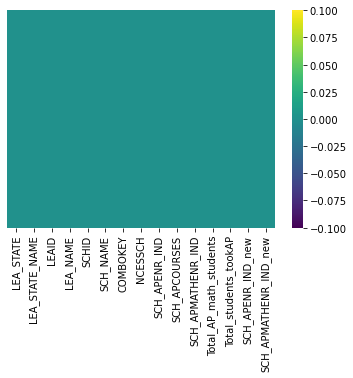

In [124]:
sns.heatmap(AP_math_clean.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [125]:
AP_math_clean.describe()

,SCH_APCOURSES,Total_AP_math_students,Total_students_tookAP,SCH_APENR_IND_new,SCH_APMATHENR_IND_new
count,28147.000000,28147.000000,28147.000000,28147.000000,28147.000000
mean,0.494369,12.574804,71.139589,0.490603,-4.202721
std,11.204833,64.120296,180.152685,0.499921,4.897040
min,-9.000000,-18.000000,-18.000000,0.000000,-9.000000
25%,-9.000000,-18.000000,-18.000000,0.000000,-9.000000
50%,-9.000000,-18.000000,-18.000000,0.000000,-9.000000
75%,8.000000,20.000000,73.000000,1.000000,1.000000
max,82.000000,1650.000000,3737.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ee7aadf10>,
      dtype=object)

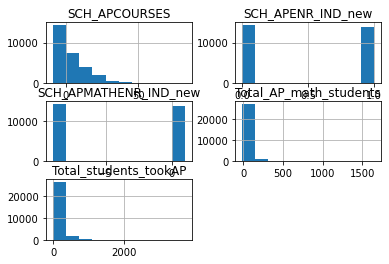

In [126]:
AP_math_clean.hist()

In [127]:
AP_math_clean.to_csv (r'/Users/dansari/Documents/GitHub/Identifying-features-to-predict-high-school-assessment-proficiency/Phase1/Data/CRDC/Clean_crdc_AP_math.csv', index = False, header=True)

In [128]:
AP_other=AP[['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME','COMBOKEY','NCESSCH','SCH_APENR_IND', 'SCH_APCOURSES', 'SCH_APOTHENR_IND',
       'Total_AP_other_students', 'Total_students_tookAP']]

In [129]:
AP_other_clean= AP_other[AP_other.SCH_APENR_IND.isin(['Yes','No'])]

In [130]:
AP_other_clean.shape

(28147, 13)

In [131]:
AP_other_clean.dtypes

LEA_STATE                  object
LEA_STATE_NAME             object
LEAID                      object
LEA_NAME                   object
SCHID                      object
SCH_NAME                   object
COMBOKEY                   object
NCESSCH                    object
SCH_APENR_IND              object
SCH_APCOURSES               int64
SCH_APOTHENR_IND           object
Total_AP_other_students     int64
Total_students_tookAP       int64
dtype: object

In [132]:
count_other = AP_other_clean['SCH_APOTHENR_IND'].value_counts() 
print(count_other) 

-9     14338
Yes    12923
No       886
Name: SCH_APOTHENR_IND, dtype: int64


In [133]:
AP_other_clean['SCH_APENR_IND_new'] = AP_other_clean['SCH_APENR_IND'].replace(['Yes','No'],['1','0'])

<ipython-input-133-88e6abf6b413>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AP_other_clean['SCH_APENR_IND_new'] = AP_other_clean['SCH_APENR_IND'].replace(['Yes','No'],['1','0'])


In [134]:
AP_other_clean[['SCH_APENR_IND_new']] = AP_other_clean[['SCH_APENR_IND_new']].astype(int)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [135]:
AP_other_clean['SCH_APOTHENR_IND_new'] = AP_other_clean['SCH_APOTHENR_IND'].replace(['Yes','No'],['1','0'])

<ipython-input-135-0841bbaade0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AP_other_clean['SCH_APOTHENR_IND_new'] = AP_other_clean['SCH_APOTHENR_IND'].replace(['Yes','No'],['1','0'])


In [136]:
AP_other_clean[['SCH_APOTHENR_IND_new']] = AP_other_clean[['SCH_APOTHENR_IND_new']].astype(int)

In [137]:
AP_other_clean.dtypes

LEA_STATE                  object
LEA_STATE_NAME             object
LEAID                      object
LEA_NAME                   object
SCHID                      object
SCH_NAME                   object
COMBOKEY                   object
NCESSCH                    object
SCH_APENR_IND              object
SCH_APCOURSES               int64
SCH_APOTHENR_IND           object
Total_AP_other_students     int64
Total_students_tookAP       int64
SCH_APENR_IND_new           int64
SCH_APOTHENR_IND_new        int64
dtype: object

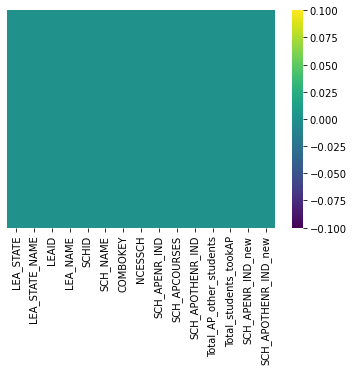

In [138]:
sns.heatmap(AP_other_clean.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [139]:
AP_other_clean.describe()

,SCH_APCOURSES,Total_AP_other_students,Total_students_tookAP,SCH_APENR_IND_new,SCH_APOTHENR_IND_new
count,28147.000000,28147.000000,28147.000000,28147.000000,28147.000000
mean,0.494369,81.200981,71.139589,0.490603,-4.125449
std,11.204833,197.752708,180.152685,0.499921,4.970095
min,-9.000000,-18.000000,-18.000000,0.000000,-9.000000
25%,-9.000000,-18.000000,-18.000000,0.000000,-9.000000
50%,-9.000000,-18.000000,-18.000000,0.000000,-9.000000
75%,8.000000,86.000000,73.000000,1.000000,1.000000
max,82.000000,3718.000000,3737.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ec8c0fbe0>,
      dtype=object)

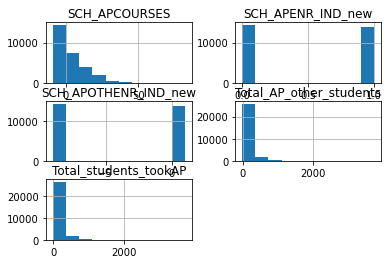

In [140]:
AP_other_clean.hist()

In [141]:
AP_other_clean.to_csv (r'/Users/dansari/Documents/GitHub/Identifying-features-to-predict-high-school-assessment-proficiency/Phase1/Data/CRDC/Clean_crdc_AP_other.csv', index = False, header=True)

### Cleaning Algebra 1 file

In [142]:
Alg1 = pandas.read_csv("Algebra I.csv",encoding='cp1252')
Alg1.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,JJ,SCH_ALGCLASSES_GS0708,SCH_ALGCERT_GS0708,...,SCH_ALGPASS_GS1112_WH_M,SCH_ALGPASS_GS1112_WH_F,SCH_ALGPASS_GS1112_TR_M,SCH_ALGPASS_GS1112_TR_F,TOT_ALGPASS_GS1112_M,TOT_ALGPASS_GS1112_F,SCH_ALGPASS_GS1112_LEP_M,SCH_ALGPASS_GS1112_LEP_F,SCH_ALGPASS_GS1112_IDEA_M,SCH_ALGPASS_GS1112_IDEA_F
0,AL,ALABAMA,100002,Alabama Youth Services,1705,Wallace Sch - Mt Meigs Campus,10000201705,Yes,0,-9,...,0,0,0,0,0,0,0,0,0,0
1,AL,ALABAMA,100002,Alabama Youth Services,1706,McNeel Sch - Vacca Campus,10000201706,Yes,0,-9,...,0,0,0,0,0,0,0,0,0,0
2,AL,ALABAMA,100002,Alabama Youth Services,1876,Alabama Youth Services,10000201876,No,0,-9,...,0,0,0,0,1,0,0,0,0,0
3,AL,ALABAMA,100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,10000299995,Yes,0,-9,...,0,0,0,0,0,0,0,0,0,0
4,AL,ALABAMA,100005,Albertville City,870,Albertville Middle School,10000500870,No,3,3,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9


In [143]:
Alg1['SCHID'] = Alg1['SCHID'].apply(lambda x: '{0:0>5}'.format(x))

In [144]:
Alg1['LEAID'] = Alg1['LEAID'].apply(lambda x: '{0:0>7}'.format(x))

In [145]:
Alg1.columns

Index(['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'JJ', 'SCH_ALGCLASSES_GS0708', 'SCH_ALGCERT_GS0708',
       ...
       'SCH_ALGPASS_GS1112_WH_M', 'SCH_ALGPASS_GS1112_WH_F',
       'SCH_ALGPASS_GS1112_TR_M', 'SCH_ALGPASS_GS1112_TR_F',
       'TOT_ALGPASS_GS1112_M', 'TOT_ALGPASS_GS1112_F',
       'SCH_ALGPASS_GS1112_LEP_M', 'SCH_ALGPASS_GS1112_LEP_F',
       'SCH_ALGPASS_GS1112_IDEA_M', 'SCH_ALGPASS_GS1112_IDEA_F'],
      dtype='object', length=136)

In [146]:
Alg1.shape

(97632, 136)

In [147]:
Alg1=Alg1[['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME','COMBOKEY','SCH_MATHCLASSES_ALG','SCH_MATHCERT_ALG','TOT_ALGENR_GS0910_M',
           'TOT_ALGENR_GS0910_F','TOT_ALGENR_GS1112_M','TOT_ALGENR_GS1112_F','TOT_ALGPASS_GS0910_M','TOT_ALGPASS_GS0910_F','TOT_ALGPASS_GS1112_M','TOT_ALGPASS_GS1112_F']]

In [148]:
Alg1.shape

(97632, 17)

In [149]:
Alg1.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,SCH_MATHCLASSES_ALG,SCH_MATHCERT_ALG,TOT_ALGENR_GS0910_M,TOT_ALGENR_GS0910_F,TOT_ALGENR_GS1112_M,TOT_ALGENR_GS1112_F,TOT_ALGPASS_GS0910_M,TOT_ALGPASS_GS0910_F,TOT_ALGPASS_GS1112_M,TOT_ALGPASS_GS1112_F
0,AL,ALABAMA,0100002,Alabama Youth Services,01705,Wallace Sch - Mt Meigs Campus,10000201705,15,15,38,0,0,0,30,0,0,0
1,AL,ALABAMA,0100002,Alabama Youth Services,01706,McNeel Sch - Vacca Campus,10000201706,6,6,18,0,0,0,18,0,0,0
2,AL,ALABAMA,0100002,Alabama Youth Services,01876,Alabama Youth Services,10000201876,6,6,17,0,1,0,17,0,1,0
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,10000299995,6,0,11,0,0,0,0,0,0,0
4,AL,ALABAMA,0100005,Albertville City,00870,Albertville Middle School,10000500870,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9


In [150]:
cols = ['LEAID', 'SCHID']
Alg1['NCESSCH'] = Alg1[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

In [151]:
Alg1.rename(columns={'TOT_ALGENR_GS0910_M':'Male_enroll_9to10_count','TOT_ALGENR_GS0910_F':'Female_enroll_9to10_count','TOT_ALGENR_GS1112_M':'Male_enroll_11to12_count',
                   'TOT_ALGENR_GS1112_F':'Female_enroll_11to12_count','TOT_ALGPASS_GS0910_M':'Male_pass_9to10_count','TOT_ALGPASS_GS0910_F':'Female_pass_9to10_count',
                  'TOT_ALGPASS_GS1112_M':'Male_pass_11to12_count','TOT_ALGPASS_GS1112_F':'Female_pass_11to12_count'}, inplace=True)

In [152]:
Alg1.columns

Index(['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'SCH_MATHCLASSES_ALG', 'SCH_MATHCERT_ALG',
       'Male_enroll_9to10_count', 'Female_enroll_9to10_count',
       'Male_enroll_11to12_count', 'Female_enroll_11to12_count',
       'Male_pass_9to10_count', 'Female_pass_9to10_count',
       'Male_pass_11to12_count', 'Female_pass_11to12_count', 'NCESSCH'],
      dtype='object')

In [153]:
Alg1['Total_Alg1_enroll_students'] = (Alg1['Male_enroll_9to10_count'] + Alg1['Female_enroll_9to10_count'] + Alg1['Male_enroll_11to12_count'] + Alg1['Female_enroll_11to12_count'])

In [154]:
Alg1['Total_Alg1_pass_students'] = (Alg1['Male_pass_9to10_count'] + Alg1['Female_pass_9to10_count'] + Alg1['Male_pass_11to12_count'] + Alg1['Female_pass_11to12_count'])

In [155]:
Alg1=Alg1[['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'SCH_MATHCLASSES_ALG', 'SCH_MATHCERT_ALG', 'NCESSCH',
       'Total_Alg1_enroll_students', 'Total_Alg1_pass_students']]

In [156]:
Alg1_clean= Alg1[Alg1.SCH_MATHCLASSES_ALG > 0]

In [157]:
Alg1_clean.shape

(22944, 12)

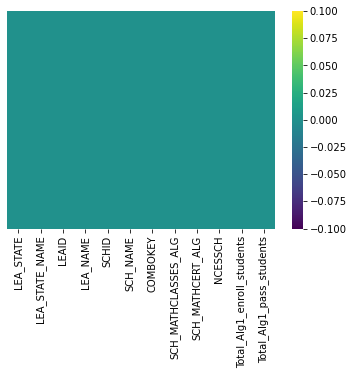

In [158]:
sns.heatmap(Alg1_clean.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [159]:
Alg1_clean.describe()

,SCH_MATHCLASSES_ALG,SCH_MATHCERT_ALG,Total_Alg1_enroll_students,Total_Alg1_pass_students
count,22944.000000,22944.000000,22944.000000,22944.000000
mean,9.472324,7.861489,137.428783,104.702232
std,12.470792,10.926388,168.244053,132.266293
min,1.000000,0.000000,-18.000000,-18.000000
25%,2.000000,2.000000,24.000000,14.000000
50%,6.000000,4.000000,72.000000,53.000000
75%,12.000000,10.000000,192.000000,148.000000
max,472.000000,472.000000,1929.000000,1374.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ec9834310>,
      dtype=object)

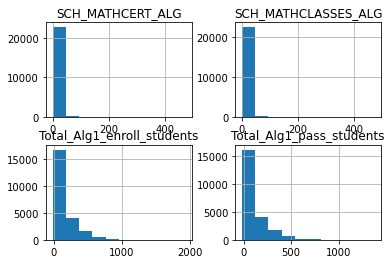

In [160]:
Alg1_clean.hist()

In [161]:
Alg1_clean.to_csv (r'/Users/dansari/Documents/GitHub/Identifying-features-to-predict-high-school-assessment-proficiency/Phase1/Data/CRDC/Clean_crdc_Alg1.csv', index = False, header=True)

### Cleaning Algebra 2 file

In [162]:
Alg2 = pandas.read_csv("Algebra II.csv",encoding='cp1252')
Alg2.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,JJ,SCH_MATHCLASSES_ALG2,SCH_MATHCERT_ALG2,...,SCH_MATHENR_ALG2_WH_M,SCH_MATHENR_ALG2_WH_F,SCH_MATHENR_ALG2_TR_M,SCH_MATHENR_ALG2_TR_F,TOT_MATHENR_ALG2_M,TOT_MATHENR_ALG2_F,SCH_MATHENR_ALG2_LEP_M,SCH_MATHENR_ALG2_LEP_F,SCH_MATHENR_ALG2_IDEA_M,SCH_MATHENR_ALG2_IDEA_F
0,AL,ALABAMA,0100002,Alabama Youth Services,1705,Wallace Sch - Mt Meigs Campus,010000201705,Yes,0,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
1,AL,ALABAMA,0100002,Alabama Youth Services,1706,McNeel Sch - Vacca Campus,010000201706,Yes,0,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
2,AL,ALABAMA,0100002,Alabama Youth Services,1876,Alabama Youth Services,010000201876,No,0,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,Yes,0,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
4,AL,ALABAMA,0100005,Albertville City,870,Albertville Middle School,010000500870,No,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9


In [163]:
Alg2['SCHID'] = Alg2['SCHID'].apply(lambda x: '{0:0>5}'.format(x))

In [164]:
Alg2['LEAID'] = Alg2['LEAID'].apply(lambda x: '{0:0>7}'.format(x))

In [165]:
Alg2.columns

Index(['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'JJ', 'SCH_MATHCLASSES_ALG2', 'SCH_MATHCERT_ALG2',
       'SCH_MATHENR_ALG2_HI_M', 'SCH_MATHENR_ALG2_HI_F',
       'SCH_MATHENR_ALG2_AM_M', 'SCH_MATHENR_ALG2_AM_F',
       'SCH_MATHENR_ALG2_AS_M', 'SCH_MATHENR_ALG2_AS_F',
       'SCH_MATHENR_ALG2_HP_M', 'SCH_MATHENR_ALG2_HP_F',
       'SCH_MATHENR_ALG2_BL_M', 'SCH_MATHENR_ALG2_BL_F',
       'SCH_MATHENR_ALG2_WH_M', 'SCH_MATHENR_ALG2_WH_F',
       'SCH_MATHENR_ALG2_TR_M', 'SCH_MATHENR_ALG2_TR_F', 'TOT_MATHENR_ALG2_M',
       'TOT_MATHENR_ALG2_F', 'SCH_MATHENR_ALG2_LEP_M',
       'SCH_MATHENR_ALG2_LEP_F', 'SCH_MATHENR_ALG2_IDEA_M',
       'SCH_MATHENR_ALG2_IDEA_F'],
      dtype='object')

In [166]:
Alg2.shape

(97632, 30)

In [167]:
Alg2=Alg2[['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME','COMBOKEY','SCH_MATHCLASSES_ALG2', 'SCH_MATHCERT_ALG2','TOT_MATHENR_ALG2_M',
       'TOT_MATHENR_ALG2_F']]

In [168]:
Alg2.shape

(97632, 11)

In [169]:
Alg2.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,SCH_MATHCLASSES_ALG2,SCH_MATHCERT_ALG2,TOT_MATHENR_ALG2_M,TOT_MATHENR_ALG2_F
0,AL,ALABAMA,0100002,Alabama Youth Services,01705,Wallace Sch - Mt Meigs Campus,010000201705,0,-9,-9,-9
1,AL,ALABAMA,0100002,Alabama Youth Services,01706,McNeel Sch - Vacca Campus,010000201706,0,-9,-9,-9
2,AL,ALABAMA,0100002,Alabama Youth Services,01876,Alabama Youth Services,010000201876,0,-9,-9,-9
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,0,-9,-9,-9
4,AL,ALABAMA,0100005,Albertville City,00870,Albertville Middle School,010000500870,-9,-9,-9,-9


In [170]:
cols = ['LEAID', 'SCHID']
Alg2['NCESSCH'] = Alg2[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

In [171]:
Alg2.rename(columns={'TOT_MATHENR_ALG2_M':'Male_enroll_Alg2_count','TOT_MATHENR_ALG2_F':'Female_enroll_Alg2_count'}, inplace=True)

In [172]:
Alg2.columns

Index(['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'SCH_MATHCLASSES_ALG2', 'SCH_MATHCERT_ALG2',
       'Male_enroll_Alg2_count', 'Female_enroll_Alg2_count', 'NCESSCH'],
      dtype='object')

In [173]:
Alg2['Total_Alg2_enroll_students'] = (Alg2['Male_enroll_Alg2_count'] + Alg2['Female_enroll_Alg2_count'])

In [174]:
Alg2=Alg2[['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'SCH_MATHCLASSES_ALG2', 'SCH_MATHCERT_ALG2', 'NCESSCH',
       'Total_Alg2_enroll_students']]

In [175]:
Alg2_clean= Alg2[Alg2.SCH_MATHCLASSES_ALG2 > 0]

In [176]:
Alg2_clean.shape

(21419, 11)

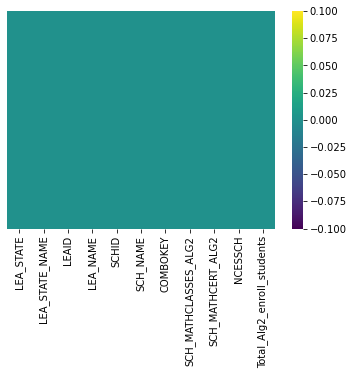

In [177]:
sns.heatmap(Alg2_clean.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [178]:
Alg2_clean.describe()

,SCH_MATHCLASSES_ALG2,SCH_MATHCERT_ALG2,Total_Alg2_enroll_students
count,21419.000000,21419.000000,21419.000000
mean,8.046874,6.758252,139.859050
std,10.082804,8.413097,167.022719
min,1.000000,0.000000,0.000000
25%,2.000000,2.000000,24.000000
50%,5.000000,4.000000,73.000000
75%,11.000000,9.000000,198.000000
max,358.000000,241.000000,1940.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ef76ef820>,
      dtype=object)

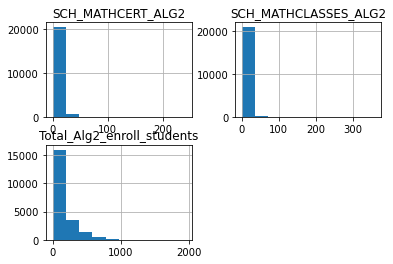

In [179]:
Alg2_clean.hist()

In [180]:
Alg2_clean.to_csv (r'/Users/dansari/Documents/GitHub/Identifying-features-to-predict-high-school-assessment-proficiency/Phase1/Data/CRDC/Clean_crdc_Alg2.csv', index = False, header=True)

### Cleaning Calculus file

In [181]:
Calculus = pandas.read_csv("Calculus.csv",encoding='cp1252')
Calculus.head()

,"""LEA_STATE""",LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,JJ,SCH_MATHCLASSES_CALC,SCH_MATHCERT_CALC,...,SCH_MATHENR_CALC_WH_M,SCH_MATHENR_CALC_WH_F,SCH_MATHENR_CALC_TR_M,SCH_MATHENR_CALC_TR_F,TOT_MATHENR_CALC_M,TOT_MATHENR_CALC_F,SCH_MATHENR_CALC_LEP_M,SCH_MATHENR_CALC_LEP_F,SCH_MATHENR_CALC_IDEA_M,SCH_MATHENR_CALC_IDEA_F
0,AL,ALABAMA,0100002,Alabama Youth Services,1705,Wallace Sch - Mt Meigs Campus,010000201705,Yes,0,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
1,AL,ALABAMA,0100002,Alabama Youth Services,1706,McNeel Sch - Vacca Campus,010000201706,Yes,0,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
2,AL,ALABAMA,0100002,Alabama Youth Services,1876,Alabama Youth Services,010000201876,No,0,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,Yes,0,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
4,AL,ALABAMA,0100005,Albertville City,870,Albertville Middle School,010000500870,No,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9


In [182]:
Calculus['SCHID'] = Calculus['SCHID'].apply(lambda x: '{0:0>5}'.format(x))

In [183]:
Calculus['LEAID'] = Calculus['LEAID'].apply(lambda x: '{0:0>7}'.format(x))

In [184]:
Calculus.columns

Index([' "LEA_STATE"', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID',
       'SCH_NAME', 'COMBOKEY', 'JJ', 'SCH_MATHCLASSES_CALC',
       'SCH_MATHCERT_CALC', 'SCH_MATHENR_CALC_HI_M', 'SCH_MATHENR_CALC_HI_F',
       'SCH_MATHENR_CALC_AM_M', 'SCH_MATHENR_CALC_AM_F',
       'SCH_MATHENR_CALC_AS_M', 'SCH_MATHENR_CALC_AS_F',
       'SCH_MATHENR_CALC_HP_M', 'SCH_MATHENR_CALC_HP_F',
       'SCH_MATHENR_CALC_BL_M', 'SCH_MATHENR_CALC_BL_F',
       'SCH_MATHENR_CALC_WH_M', 'SCH_MATHENR_CALC_WH_F',
       'SCH_MATHENR_CALC_TR_M', 'SCH_MATHENR_CALC_TR_F', 'TOT_MATHENR_CALC_M',
       'TOT_MATHENR_CALC_F', 'SCH_MATHENR_CALC_LEP_M',
       'SCH_MATHENR_CALC_LEP_F', 'SCH_MATHENR_CALC_IDEA_M',
       'SCH_MATHENR_CALC_IDEA_F'],
      dtype='object')

In [185]:
Calculus.shape

(97632, 30)

In [186]:
Calculus=Calculus[[' "LEA_STATE"', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME','COMBOKEY','SCH_MATHCLASSES_CALC','SCH_MATHCERT_CALC','TOT_MATHENR_CALC_M','TOT_MATHENR_CALC_F']]

In [187]:
Calculus.shape

(97632, 11)

In [188]:
cols = ['LEAID', 'SCHID']
Calculus['NCESSCH'] = Calculus[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

In [189]:
Calculus['Total_Calc_enroll_students'] = (Calculus['TOT_MATHENR_CALC_M'] + Calculus['TOT_MATHENR_CALC_M'])

In [190]:
Calculus.columns

Index([' "LEA_STATE"', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID',
       'SCH_NAME', 'COMBOKEY', 'SCH_MATHCLASSES_CALC', 'SCH_MATHCERT_CALC',
       'TOT_MATHENR_CALC_M', 'TOT_MATHENR_CALC_F', 'NCESSCH',
       'Total_Calc_enroll_students'],
      dtype='object')

In [191]:
Calculus=Calculus[[' "LEA_STATE"', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME','COMBOKEY','NCESSCH','SCH_MATHCLASSES_CALC','SCH_MATHCERT_CALC','Total_Calc_enroll_students']]

In [192]:
Calculus_clean=Calculus[Calculus.SCH_MATHCLASSES_CALC > 0]

In [193]:
Calculus_clean.shape

(13120, 11)

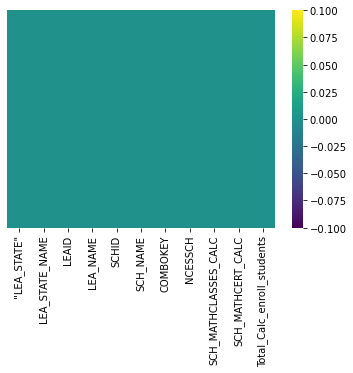

In [194]:
sns.heatmap(Calculus_clean.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [195]:
Calculus_clean.describe()

,SCH_MATHCLASSES_CALC,SCH_MATHCERT_CALC,Total_Calc_enroll_students
count,13120.000000,13120.000000,13120.000000
mean,3.281250,2.948018,52.461433
std,4.166317,3.864309,77.843291
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,10.000000
50%,2.000000,2.000000,24.000000
75%,4.000000,4.000000,64.000000
max,152.000000,152.000000,1080.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ebc40fd00>,
      dtype=object)

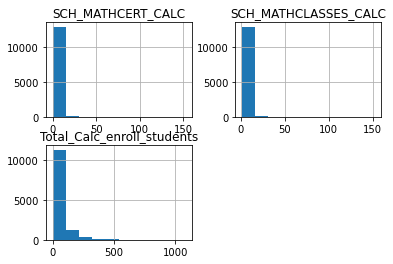

In [196]:
Calculus_clean.hist()

In [197]:
Calculus_clean.to_csv (r'/Users/dansari/Documents/GitHub/Identifying-features-to-predict-high-school-assessment-proficiency/Phase1/Data/CRDC/Clean_crdc_calculus.csv', index = False,header=True)

### Cleaning Geometry file

In [198]:
Geometry = pandas.read_csv("Geometry.csv",encoding='cp1252')
Geometry.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,JJ,SCH_GEOMENR_G08_IND,SCH_GEOMENR_G08,...,SCH_MATHENR_GEOM_WH_M,SCH_MATHENR_GEOM_WH_F,SCH_MATHENR_GEOM_TR_M,SCH_MATHENR_GEOM_TR_F,TOT_MATHENR_GEOM_M,TOT_MATHENR_GEOM_F,SCH_MATHENR_GEOM_LEP_M,SCH_MATHENR_GEOM_LEP_F,SCH_MATHENR_GEOM_IDEA_M,SCH_MATHENR_GEOM_IDEA_F
0,AL,ALABAMA,0100002,Alabama Youth Services,1705,Wallace Sch - Mt Meigs Campus,010000201705,Yes,No,-9,...,2,0,0,0,25,0,0,0,0,0
1,AL,ALABAMA,0100002,Alabama Youth Services,1706,McNeel Sch - Vacca Campus,010000201706,Yes,No,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
2,AL,ALABAMA,0100002,Alabama Youth Services,1876,Alabama Youth Services,010000201876,No,No,-9,...,2,0,0,0,8,0,0,0,1,0
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,Yes,No,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
4,AL,ALABAMA,0100005,Albertville City,870,Albertville Middle School,010000500870,No,No,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9


In [199]:
Geometry['SCHID'] = Geometry['SCHID'].apply(lambda x: '{0:0>5}'.format(x))

In [200]:
Geometry['LEAID'] = Geometry['LEAID'].apply(lambda x: '{0:0>7}'.format(x))

In [201]:
Geometry.columns

Index(['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'JJ', 'SCH_GEOMENR_G08_IND', 'SCH_GEOMENR_G08',
       'SCH_MATHCERT_GEOM', 'SCH_MATHCLASSES_GEOM', 'SCH_MATHENR_GEOM_HI_M',
       'SCH_MATHENR_GEOM_HI_F', 'SCH_MATHENR_GEOM_AM_M',
       'SCH_MATHENR_GEOM_AM_F', 'SCH_MATHENR_GEOM_AS_M',
       'SCH_MATHENR_GEOM_AS_F', 'SCH_MATHENR_GEOM_HP_M',
       'SCH_MATHENR_GEOM_HP_F', 'SCH_MATHENR_GEOM_BL_M',
       'SCH_MATHENR_GEOM_BL_F', 'SCH_MATHENR_GEOM_WH_M',
       'SCH_MATHENR_GEOM_WH_F', 'SCH_MATHENR_GEOM_TR_M',
       'SCH_MATHENR_GEOM_TR_F', 'TOT_MATHENR_GEOM_M', 'TOT_MATHENR_GEOM_F',
       'SCH_MATHENR_GEOM_LEP_M', 'SCH_MATHENR_GEOM_LEP_F',
       'SCH_MATHENR_GEOM_IDEA_M', 'SCH_MATHENR_GEOM_IDEA_F'],
      dtype='object')

In [202]:
Geometry.shape

(97632, 32)

In [203]:
Geometry=Geometry[['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME','COMBOKEY','SCH_MATHCERT_GEOM','SCH_MATHCLASSES_GEOM','TOT_MATHENR_GEOM_M','TOT_MATHENR_GEOM_F']]

In [204]:
Geometry.shape

(97632, 11)

In [205]:
cols = ['LEAID', 'SCHID']
Geometry['NCESSCH'] = Geometry[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

In [206]:
Geometry['Total_Geomty_enroll_students'] = (Geometry['TOT_MATHENR_GEOM_M'] + Geometry['TOT_MATHENR_GEOM_F'])

In [207]:
Geometry.columns

Index(['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'SCH_MATHCERT_GEOM', 'SCH_MATHCLASSES_GEOM',
       'TOT_MATHENR_GEOM_M', 'TOT_MATHENR_GEOM_F', 'NCESSCH',
       'Total_Geomty_enroll_students'],
      dtype='object')

In [208]:
Geometry=Geometry[['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME','COMBOKEY','NCESSCH','SCH_MATHCERT_GEOM','SCH_MATHCLASSES_GEOM','Total_Geomty_enroll_students']]

In [209]:
Geometry_clean=Geometry[Geometry.SCH_MATHCLASSES_GEOM > 0]

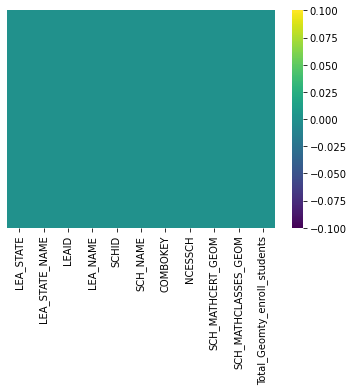

In [210]:
sns.heatmap(Geometry_clean.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [211]:
Geometry_clean.describe()

,SCH_MATHCERT_GEOM,SCH_MATHCLASSES_GEOM,Total_Geomty_enroll_students
count,22489.000000,22489.000000,22489.000000
mean,7.760149,9.235093,152.700832
std,10.034067,11.479612,180.697381
min,0.000000,1.000000,1.000000
25%,2.000000,2.000000,26.000000
50%,4.000000,5.000000,80.000000
75%,10.000000,12.000000,219.000000
max,316.000000,316.000000,2043.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8ea6260490>,
      dtype=object)

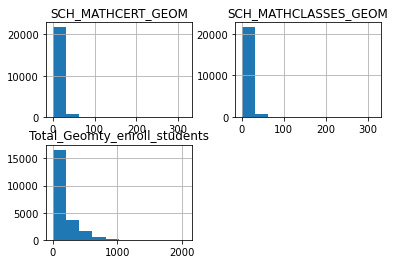

In [212]:
Geometry_clean.hist()

In [213]:
Geometry_clean.to_csv (r'/Users/dansari/Documents/GitHub/Identifying-features-to-predict-high-school-assessment-proficiency/Phase1/Data/CRDC/Clean_crdc_geometry.csv', index = False,header=True)

### Cleaning Enrollment file

In [214]:
Enroll = pandas.read_csv("Enrollment.csv",encoding='cp1252')
Enroll.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,JJ,SCH_PSENR_NONIDEA_A3,SCH_PSENR_NONIDEA_A4,...,SCH_504ENR_BL_M,SCH_504ENR_BL_F,SCH_504ENR_WH_M,SCH_504ENR_WH_F,SCH_504ENR_TR_M,SCH_504ENR_TR_F,TOT_504ENR_M,TOT_504ENR_F,SCH_504ENR_LEP_M,SCH_504ENR_LEP_F
0,AL,ALABAMA,100002,Alabama Youth Services,1705,Wallace Sch - Mt Meigs Campus,10000201705,Yes,-9,-9,...,0,0,0,0,0,0,0,0,0,0
1,AL,ALABAMA,100002,Alabama Youth Services,1706,McNeel Sch - Vacca Campus,10000201706,Yes,-9,-9,...,0,0,0,0,0,0,0,0,0,0
2,AL,ALABAMA,100002,Alabama Youth Services,1876,Alabama Youth Services,10000201876,No,-9,-9,...,0,0,0,0,0,0,0,0,0,0
3,AL,ALABAMA,100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,10000299995,Yes,-9,-9,...,0,0,0,0,0,0,0,0,0,0
4,AL,ALABAMA,100005,Albertville City,870,Albertville Middle School,10000500870,No,-9,-9,...,0,0,0,4,0,0,0,4,0,0


In [215]:
Enroll['SCHID'] = Enroll['SCHID'].apply(lambda x: '{0:0>5}'.format(x))

In [216]:
Enroll['LEAID'] = Enroll['LEAID'].apply(lambda x: '{0:0>7}'.format(x))

In [217]:
Enroll.columns

Index(['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'JJ', 'SCH_PSENR_NONIDEA_A3', 'SCH_PSENR_NONIDEA_A4',
       ...
       'SCH_504ENR_BL_M', 'SCH_504ENR_BL_F', 'SCH_504ENR_WH_M',
       'SCH_504ENR_WH_F', 'SCH_504ENR_TR_M', 'SCH_504ENR_TR_F', 'TOT_504ENR_M',
       'TOT_504ENR_F', 'SCH_504ENR_LEP_M', 'SCH_504ENR_LEP_F'],
      dtype='object', length=123)

In [218]:
Enroll.shape

(97632, 123)

In [219]:
Enroll=Enroll[['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME','COMBOKEY','TOT_ENR_M','TOT_ENR_F']]

In [220]:
Enroll.shape

(97632, 9)

In [221]:
cols = ['LEAID', 'SCHID']
Enroll['NCESSCH'] = Enroll[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

In [222]:
Enroll['Total_enroll_students'] = (Enroll['TOT_ENR_M'] + Enroll['TOT_ENR_F'])

In [223]:
Enroll.columns

Index(['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'TOT_ENR_M', 'TOT_ENR_F', 'NCESSCH',
       'Total_enroll_students'],
      dtype='object')

In [224]:
Enroll=Enroll[['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME','COMBOKEY','NCESSCH','Total_enroll_students']]

In [225]:
Enroll_clean=Enroll[Enroll.Total_enroll_students > 0]

In [226]:
Enroll_clean.shape

(97621, 9)

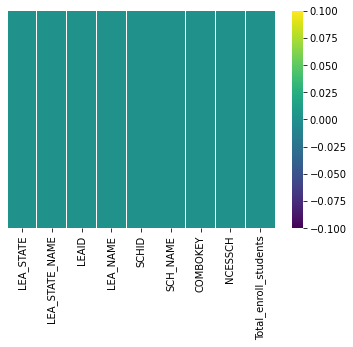

In [227]:
sns.heatmap(Enroll_clean.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [228]:
Enroll_clean.describe()

,Total_enroll_students
count,97621.000000
mean,521.633675
std,447.717932
min,1.000000
25%,252.000000
50%,438.000000
75%,657.000000
max,14286.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8eb944d910>]],
      dtype=object)

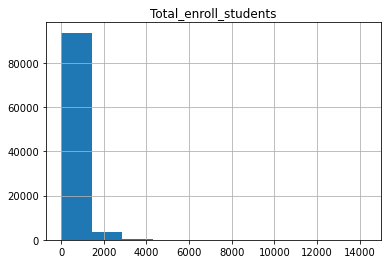

In [229]:
Enroll_clean.hist()

In [230]:
Enroll_clean.to_csv (r'/Users/dansari/Documents/GitHub/Identifying-features-to-predict-high-school-assessment-proficiency/Phase1/Data/CRDC/Clean_crdc_enrollment.csv', index = False,header=True)

#### Merge CRDC master with CCD directory to extract only high schools

In [231]:
cd /Users/dansari/Documents/GitHub/Identifying-features-to-predict-high-school-assessment-proficiency/Phase1/Data/CCD

/Users/dansari/Documents/GitHub/Identifying-features-to-predict-high-school-assessment-proficiency/Phase1/Data/CCD


In [232]:
ccd_directory= pandas.read_csv("Clean_ccd_directory.csv")
ccd_directory.head()

,SCHOOL_YEAR,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,ST_LEAID,LEAID,ST_SCHID,NCESSCH,SCHID,SY_STATUS,SCH_TYPE_TEXT,SCH_TYPE,LEVEL
0,2017-2018,AL,Albertville Middle School,Albertville City,1,AL-101,100005,AL-101-0010,10000500870,100870,1,Regular School,1,Middle
1,2017-2018,AL,Albertville High School,Albertville City,1,AL-101,100005,AL-101-0020,10000500871,100871,1,Regular School,1,High
2,2017-2018,AL,Evans Elementary School,Albertville City,1,AL-101,100005,AL-101-0110,10000500879,100879,1,Regular School,1,Middle
3,2017-2018,AL,Albertville Elementary School,Albertville City,1,AL-101,100005,AL-101-0200,10000500889,100889,1,Regular School,1,Elementary
4,2017-2018,AL,Big Spring Lake Kindergarten School,Albertville City,1,AL-101,100005,AL-101-0035,10000501616,101616,1,Regular School,1,Elementary


In [233]:
ccd_directory['NCESSCH'] = ccd_directory['NCESSCH'].apply(lambda x: '{0:0>12}'.format(x))

In [234]:
ccd_directory.drop(ccd_directory.columns[[4,5,6,10,11]], axis=1, inplace=True)

In [235]:
ccd_directory.shape

(102337, 9)

In [236]:
Sch_char_merged_ccd = pandas.merge(left=Sch_char,right=ccd_directory, how='left', left_on='NCESSCH', right_on='NCESSCH')
Sch_char_merged_ccd.shape

(97632, 24)

In [237]:
Sch_char_merged_ccd.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME_x,SCHID_x,SCH_NAME_x,COMBOKEY,Special_ed_schl,Magnet_schl,Charter_Schl,...,Charter_Schl_new,Alternate_schl_new,SCHOOL_YEAR,ST,SCH_NAME_y,LEA_NAME_y,ST_SCHID,SCHID_y,SCH_TYPE,LEVEL
0,AL,ALABAMA,0100002,Alabama Youth Services,01705,Wallace Sch - Mt Meigs Campus,010000201705,No,No,No,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AL,ALABAMA,0100002,Alabama Youth Services,01706,McNeel Sch - Vacca Campus,010000201706,No,No,No,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AL,ALABAMA,0100002,Alabama Youth Services,01876,Alabama Youth Services,010000201876,No,No,No,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,No,No,No,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AL,ALABAMA,0100005,Albertville City,00870,Albertville Middle School,010000500870,No,No,No,...,0,0,2017-2018,AL,Albertville Middle School,Albertville City,AL-101-0010,100870.0,1.0,Middle


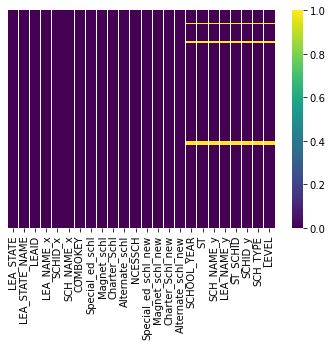

In [238]:
sns.heatmap(Sch_char_merged_ccd.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [239]:
null_columns=Sch_char_merged_ccd.columns[Sch_char_merged_ccd.isnull().any()]
Sch_char_merged_ccd[null_columns].isnull().sum()

SCHOOL_YEAR    3768
ST             3768
SCH_NAME_y     3768
LEA_NAME_y     3768
ST_SCHID       3768
SCHID_y        3768
SCH_TYPE       3768
LEVEL          3768
dtype: int64

#### Keeping only high schools

In [240]:
Sch_char_hs=Sch_char_merged_ccd[Sch_char_merged_ccd['LEVEL']=='High' ]

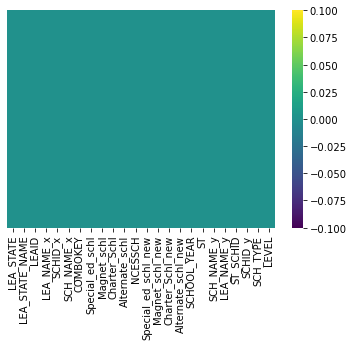

In [241]:
sns.heatmap(Sch_char_hs.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [242]:
Sch_char_hs.shape

(20685, 24)

In [243]:
Sch_char_hs.columns

Index(['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY', 'Special_ed_schl', 'Magnet_schl',
       'Charter_Schl', 'Alternate_schl', 'NCESSCH', 'Special_ed_schl_new',
       'Magnet_schl_new', 'Charter_Schl_new', 'Alternate_schl_new',
       'SCHOOL_YEAR', 'ST', 'SCH_NAME_y', 'LEA_NAME_y', 'ST_SCHID', 'SCHID_y',
       'SCH_TYPE', 'LEVEL'],
      dtype='object')

In [244]:
Sch_char_hs.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME_x,SCHID_x,SCH_NAME_x,COMBOKEY,Special_ed_schl,Magnet_schl,Charter_Schl,...,Charter_Schl_new,Alternate_schl_new,SCHOOL_YEAR,ST,SCH_NAME_y,LEA_NAME_y,ST_SCHID,SCHID_y,SCH_TYPE,LEVEL
5,AL,ALABAMA,0100005,Albertville City,00871,Albertville High School,010000500871,No,No,No,...,0,0,2017-2018,AL,Albertville High School,Albertville City,AL-101-0020,100871.0,1.0,High
11,AL,ALABAMA,0100006,Marshall County,00872,Asbury High School,010000600872,No,No,No,...,0,0,2017-2018,AL,Asbury High School,Marshall County,AL-048-0030,100872.0,1.0,High
14,AL,ALABAMA,0100006,Marshall County,00878,Douglas High School,010000600878,No,No,No,...,0,0,2017-2018,AL,Douglas High School,Marshall County,AL-048-0100,100878.0,1.0,High
16,AL,ALABAMA,0100006,Marshall County,00883,Kate D Smith DAR High School,010000600883,No,No,No,...,0,0,2017-2018,AL,Kate D Smith DAR High School,Marshall County,AL-048-0140,100883.0,1.0,High
19,AL,ALABAMA,0100006,Marshall County,01585,Brindlee Mountain High School,010000601585,No,No,No,...,0,0,2017-2018,AL,Brindlee Mountain High School,Marshall County,AL-048-0042,101585.0,1.0,High


In [317]:
Sch_char_hs.drop([col for col in Sch_char_hs.columns if col.endswith('_y')],axis=1,inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [318]:
HS_Sch_char=Sch_char_hs[['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME_x', 'SCHID_x','SCH_NAME_x','COMBOKEY','Special_ed_schl_new',
       'Magnet_schl_new', 'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH','LEVEL']]

In [319]:
HS_Sch_char.shape

(20685, 13)

#### Merge remaining CRDC clean files

##### Merging with school enroll

In [320]:
HS_Sch_char_merged_enroll = pandas.merge(left=HS_Sch_char,right=Enroll_clean, how='left', left_on='NCESSCH', right_on='NCESSCH')
HS_Sch_char_merged_enroll.shape

(20685, 21)

In [321]:
HS_Sch_char_merged_enroll.columns

Index(['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new', 'Magnet_schl_new',
       'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL',
       'LEA_STATE_y', 'LEA_STATE_NAME_y', 'LEAID_y', 'LEA_NAME', 'SCHID',
       'SCH_NAME', 'COMBOKEY_y', 'Total_enroll_students'],
      dtype='object')

In [322]:
#HS_Sch_char_merged_exp.head()

In [323]:
HS_Sch_char_merged_enroll.drop([col for col in HS_Sch_char_merged_enroll.columns if col.endswith('_y')],axis=1,inplace=True)

In [324]:
HS_Sch_char_merged_enroll.columns

Index(['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new', 'Magnet_schl_new',
       'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL',
       'LEA_NAME', 'SCHID', 'SCH_NAME', 'Total_enroll_students'],
      dtype='object')

In [325]:
HS_Sch_char_merged_enroll.shape

(20685, 17)

In [388]:
HS_Sch_char_enroll=HS_Sch_char_merged_enroll[['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new','Magnet_schl_new', 'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL', 'Total_enroll_students']]

##### Merging with school support

In [389]:
HS_Sch_char_enroll_merged_sup = pandas.merge(left=HS_Sch_char_enroll,right=Sch_sup_clean, how='left', left_on='NCESSCH', right_on='NCESSCH')
HS_Sch_char_enroll_merged_sup.shape

(20685, 24)

In [390]:
HS_Sch_char_enroll_merged_sup.columns

Index(['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new', 'Magnet_schl_new',
       'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL',
       'Total_enroll_students', 'LEA_STATE', 'LEA_STATE_NAME', 'LEAID',
       'LEA_NAME', 'SCHID', 'SCH_NAME', 'COMBOKEY', 'SCH_FTETEACH_TOT',
       'SCH_FTETEACH_CERT', 'SCH_FTETEACH_NOTCERT'],
      dtype='object')

In [391]:
HS_Sch_char_enroll_merged_sup.head()

,LEA_STATE_x,LEA_STATE_NAME_x,LEAID_x,LEA_NAME_x,SCHID_x,SCH_NAME_x,COMBOKEY_x,Special_ed_schl_new,Magnet_schl_new,Charter_Schl_new,...,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,SCH_FTETEACH_TOT,SCH_FTETEACH_CERT,SCH_FTETEACH_NOTCERT
0,AL,ALABAMA,0100005,Albertville City,00871,Albertville High School,010000500871,0,0,0,...,AL,ALABAMA,0100005,Albertville City,00871,Albertville High School,010000500871,78.17,71.17,7.0
1,AL,ALABAMA,0100006,Marshall County,00872,Asbury High School,010000600872,0,0,0,...,AL,ALABAMA,0100006,Marshall County,00872,Asbury High School,010000600872,32.00,31.00,1.0
2,AL,ALABAMA,0100006,Marshall County,00878,Douglas High School,010000600878,0,0,0,...,AL,ALABAMA,0100006,Marshall County,00878,Douglas High School,010000600878,36.00,36.00,0.0
3,AL,ALABAMA,0100006,Marshall County,00883,Kate D Smith DAR High School,010000600883,0,0,0,...,AL,ALABAMA,0100006,Marshall County,00883,Kate D Smith DAR High School,010000600883,29.00,29.00,0.0
4,AL,ALABAMA,0100006,Marshall County,01585,Brindlee Mountain High School,010000601585,0,0,0,...,AL,ALABAMA,0100006,Marshall County,01585,Brindlee Mountain High School,010000601585,37.00,36.00,1.0


In [450]:
HS_Sch_char_enroll_sup=HS_Sch_char_enroll_merged_sup[['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new', 'Magnet_schl_new', 'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL', 'Total_enroll_students','SCH_FTETEACH_TOT',
       'SCH_FTETEACH_CERT', 'SCH_FTETEACH_NOTCERT']]

In [451]:
HS_Sch_char_enroll_sup.shape

(20685, 17)

##### Merging with school expenditures

In [452]:
HS_Sch_char_enroll_sup_merged_exp = pandas.merge(left=HS_Sch_char_enroll_sup,right=Sch_exp_clean, how='left', left_on='NCESSCH', right_on='NCESSCH')
HS_Sch_char_enroll_sup_merged_exp.shape

(20685, 26)

In [453]:
HS_Sch_char_enroll_sup_merged_exp.columns

Index(['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new', 'Magnet_schl_new',
       'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL',
       'Total_enroll_students', 'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT',
       'SCH_FTETEACH_NOTCERT', 'LEA_STATE', 'LEA_STATE_NAME', 'LEAID',
       'LEA_NAME', 'SCHID', 'SCH_NAME', 'COMBOKEY', 'FTE_teachers_count',
       'SalaryforTeachers'],
      dtype='object')

In [454]:
HS_Sch_char_enroll_sup_merged_exp.head()

,LEA_STATE_x,LEA_STATE_NAME_x,LEAID_x,LEA_NAME_x,SCHID_x,SCH_NAME_x,COMBOKEY_x,Special_ed_schl_new,Magnet_schl_new,Charter_Schl_new,...,SCH_FTETEACH_NOTCERT,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,FTE_teachers_count,SalaryforTeachers
0,AL,ALABAMA,0100005,Albertville City,00871,Albertville High School,010000500871,0,0,0,...,7.0,AL,ALABAMA,0100005,Albertville City,00871,Albertville High School,010000500871,72.88,3780956.34
1,AL,ALABAMA,0100006,Marshall County,00872,Asbury High School,010000600872,0,0,0,...,1.0,AL,ALABAMA,0100006,Marshall County,00872,Asbury High School,010000600872,32.00,1551823.89
2,AL,ALABAMA,0100006,Marshall County,00878,Douglas High School,010000600878,0,0,0,...,0.0,AL,ALABAMA,0100006,Marshall County,00878,Douglas High School,010000600878,36.00,1654974.93
3,AL,ALABAMA,0100006,Marshall County,00883,Kate D Smith DAR High School,010000600883,0,0,0,...,0.0,AL,ALABAMA,0100006,Marshall County,00883,Kate D Smith DAR High School,010000600883,29.00,1256524.51
4,AL,ALABAMA,0100006,Marshall County,01585,Brindlee Mountain High School,010000601585,0,0,0,...,1.0,AL,ALABAMA,0100006,Marshall County,01585,Brindlee Mountain High School,010000601585,37.00,1540288.05


In [455]:
HS_Sch_char_enroll_sup_exp=HS_Sch_char_enroll_sup_merged_exp[['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new','Magnet_schl_new', 'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL', 'Total_enroll_students','SCH_FTETEACH_TOT',
       'SCH_FTETEACH_CERT', 'SCH_FTETEACH_NOTCERT','FTE_teachers_count','SalaryforTeachers']]

In [456]:
HS_Sch_char_enroll_sup_exp.shape

(20685, 19)

##### Merging with SAT_ACT

In [457]:
HS_Sch_char_enroll_sup_exp_merged_SA = pandas.merge(left=HS_Sch_char_enroll_sup_exp,right=SAT_ACT_clean, how='left', left_on='NCESSCH', right_on='NCESSCH')
HS_Sch_char_enroll_sup_exp_merged_SA.shape

(20685, 29)

In [458]:
HS_Sch_char_enroll_sup_exp_merged_SA.columns

Index(['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new', 'Magnet_schl_new',
       'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL',
       'Total_enroll_students', 'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT',
       'SCH_FTETEACH_NOTCERT', 'FTE_teachers_count', 'SalaryforTeachers',
       'LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'Male_part_count', 'Female_part_count',
       'Total_SAT_ACT_students'],
      dtype='object')

In [459]:
HS_Sch_char_enroll_sup_exp_merged_SA.head()

,LEA_STATE_x,LEA_STATE_NAME_x,LEAID_x,LEA_NAME_x,SCHID_x,SCH_NAME_x,COMBOKEY_x,Special_ed_schl_new,Magnet_schl_new,Charter_Schl_new,...,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,Male_part_count,Female_part_count,Total_SAT_ACT_students
0,AL,ALABAMA,0100005,Albertville City,00871,Albertville High School,010000500871,0,0,0,...,AL,ALABAMA,0100005,Albertville City,00871,Albertville High School,010000500871,177.0,186.0,363.0
1,AL,ALABAMA,0100006,Marshall County,00872,Asbury High School,010000600872,0,0,0,...,AL,ALABAMA,0100006,Marshall County,00872,Asbury High School,010000600872,37.0,24.0,61.0
2,AL,ALABAMA,0100006,Marshall County,00878,Douglas High School,010000600878,0,0,0,...,AL,ALABAMA,0100006,Marshall County,00878,Douglas High School,010000600878,83.0,59.0,142.0
3,AL,ALABAMA,0100006,Marshall County,00883,Kate D Smith DAR High School,010000600883,0,0,0,...,AL,ALABAMA,0100006,Marshall County,00883,Kate D Smith DAR High School,010000600883,56.0,47.0,103.0
4,AL,ALABAMA,0100006,Marshall County,01585,Brindlee Mountain High School,010000601585,0,0,0,...,AL,ALABAMA,0100006,Marshall County,01585,Brindlee Mountain High School,010000601585,45.0,31.0,76.0


In [460]:
HS_Sch_char_enroll_sup_exp_SA=HS_Sch_char_enroll_sup_exp_merged_SA[['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new','Magnet_schl_new', 'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL', 'Total_enroll_students','SCH_FTETEACH_TOT',
       'SCH_FTETEACH_CERT', 'SCH_FTETEACH_NOTCERT','FTE_teachers_count','SalaryforTeachers','Total_SAT_ACT_students']]

In [461]:
HS_Sch_char_enroll_sup_exp_SA.shape

(20685, 20)

##### Merging with IB

In [462]:
HS_Sch_char_enroll_sup_exp_SA_merged_IB = pandas.merge(left=HS_Sch_char_enroll_sup_exp_SA,right=IB_clean, how='left', left_on='NCESSCH', right_on='NCESSCH')
HS_Sch_char_enroll_sup_exp_SA_merged_IB.shape

(20685, 32)

In [463]:
HS_Sch_char_enroll_sup_exp_SA_merged_IB.columns

Index(['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new', 'Magnet_schl_new',
       'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL',
       'Total_enroll_students', 'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT',
       'SCH_FTETEACH_NOTCERT', 'FTE_teachers_count', 'SalaryforTeachers',
       'Total_SAT_ACT_students', 'LEA_STATE', 'LEA_STATE_NAME', 'LEAID',
       'LEA_NAME', 'SCHID', 'SCH_NAME', 'COMBOKEY', 'SCH_IBENR_IND',
       'Male_enroll_count', 'Female_enroll_count', 'Total_IB_students',
       'SCH_IBENR_IND_new'],
      dtype='object')

In [464]:
#HS_Sch_char_enroll_sup_exp_SA_merged_IB.head()

In [465]:
HS_Sch_char_enroll_sup_exp_SA_IB=HS_Sch_char_enroll_sup_exp_SA_merged_IB[['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new','Magnet_schl_new', 'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL',
       'Total_enroll_students', 'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT','SCH_FTETEACH_NOTCERT', 'FTE_teachers_count', 'SalaryforTeachers',
       'Total_SAT_ACT_students','SCH_IBENR_IND_new','Total_IB_students']]

In [466]:
HS_Sch_char_enroll_sup_exp_SA_IB.shape

(20685, 22)

##### Merging with AP other

In [467]:
HS_Sch_char_enroll_sup_exp_SA_IB_merged_AP_other = pandas.merge(left=HS_Sch_char_enroll_sup_exp_SA_IB,right=AP_other_clean, how='left', left_on='NCESSCH', right_on='NCESSCH')
HS_Sch_char_enroll_sup_exp_SA_IB_merged_AP_other.shape

(20685, 36)

In [468]:
HS_Sch_char_enroll_sup_exp_SA_IB_merged_AP_other.columns

Index(['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new', 'Magnet_schl_new',
       'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL',
       'Total_enroll_students', 'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT',
       'SCH_FTETEACH_NOTCERT', 'FTE_teachers_count', 'SalaryforTeachers',
       'Total_SAT_ACT_students', 'SCH_IBENR_IND_new', 'Total_IB_students',
       'LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'SCH_APENR_IND', 'SCH_APCOURSES', 'SCH_APOTHENR_IND',
       'Total_AP_other_students', 'Total_students_tookAP', 'SCH_APENR_IND_new',
       'SCH_APOTHENR_IND_new'],
      dtype='object')

In [469]:
#HS_Sch_char_enroll_sup_exp_SA_IB_merged_AP_other.head()

In [470]:
HS_Sch_char_enroll_sup_exp_SA_IB_AP_other=HS_Sch_char_enroll_sup_exp_SA_IB_merged_AP_other[['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new','Magnet_schl_new', 'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL','Total_enroll_students', 'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT',
       'SCH_FTETEACH_NOTCERT', 'FTE_teachers_count', 'SalaryforTeachers','Total_SAT_ACT_students', 'SCH_IBENR_IND_new', 'Total_IB_students','SCH_APENR_IND_new', 'SCH_APCOURSES', 'SCH_APOTHENR_IND_new',
       'Total_AP_other_students', 'Total_students_tookAP']]

In [471]:
HS_Sch_char_enroll_sup_exp_SA_IB_AP_other.shape

(20685, 27)

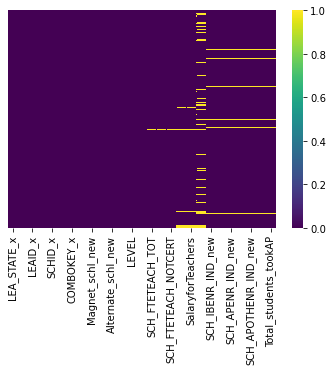

In [472]:
sns.heatmap(HS_Sch_char_enroll_sup_exp_SA_IB_AP_other.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [473]:
null_columns=HS_Sch_char_enroll_sup_exp_SA_IB_AP_other.columns[HS_Sch_char_enroll_sup_exp_SA_IB_AP_other.isnull().any()]
HS_Sch_char_enroll_sup_exp_SA_IB_AP_other[null_columns].isnull().sum()

Total_enroll_students         1
SCH_FTETEACH_TOT            269
SCH_FTETEACH_CERT           269
SCH_FTETEACH_NOTCERT        269
FTE_teachers_count          773
SalaryforTeachers           773
Total_SAT_ACT_students     3137
SCH_IBENR_IND_new           402
Total_IB_students           402
SCH_APENR_IND_new           404
SCH_APCOURSES               404
SCH_APOTHENR_IND_new        404
Total_AP_other_students     404
Total_students_tookAP       404
dtype: int64

In [474]:
crdc_master_read = HS_Sch_char_enroll_sup_exp_SA_IB_AP_other.dropna(axis = 0, how ='any') 

In [475]:
print("Old data frame length:", len(HS_Sch_char_enroll_sup_exp_SA_IB_AP_other)) 
print("New data frame length:", len(crdc_master_read))  
print("Number of rows with at least 1 NA value: ", 
      (len(HS_Sch_char_enroll_sup_exp_SA_IB_AP_other)-len(crdc_master_read))) 

Old data frame length: 20685
New data frame length: 17208
Number of rows with at least 1 NA value:  3477


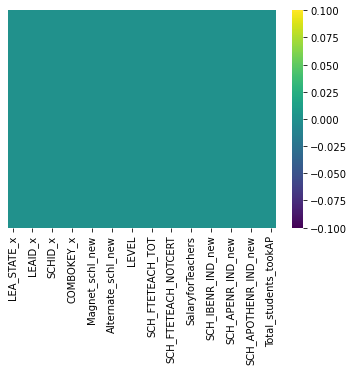

In [476]:
sns.heatmap(crdc_master_read.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [477]:
crdc_master_read.shape

(17208, 27)

In [478]:
crdc_master_read.to_csv (r'/Users/dansari/Documents/GitHub/Identifying-features-to-predict-high-school-assessment-proficiency/Phase1/Data/CRDC/Clean_crdc_master_read.csv', index = False,header=True)

##### Merging with AP math

In [479]:
HS_Sch_char_enroll_sup_exp_SA_IB_merged_AP_math = pandas.merge(left=HS_Sch_char_enroll_sup_exp_SA_IB,right=AP_math_clean, how='left', left_on='NCESSCH', right_on='NCESSCH')
HS_Sch_char_enroll_sup_exp_SA_IB_merged_AP_math.shape

(20685, 36)

In [480]:
HS_Sch_char_enroll_sup_exp_SA_IB_merged_AP_math.columns

Index(['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new', 'Magnet_schl_new',
       'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL',
       'Total_enroll_students', 'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT',
       'SCH_FTETEACH_NOTCERT', 'FTE_teachers_count', 'SalaryforTeachers',
       'Total_SAT_ACT_students', 'SCH_IBENR_IND_new', 'Total_IB_students',
       'LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'SCH_APENR_IND', 'SCH_APCOURSES', 'SCH_APMATHENR_IND',
       'Total_AP_math_students', 'Total_students_tookAP', 'SCH_APENR_IND_new',
       'SCH_APMATHENR_IND_new'],
      dtype='object')

In [481]:
HS_Sch_char_enroll_sup_exp_SA_IB_APmath=HS_Sch_char_enroll_sup_exp_SA_IB_merged_AP_math[['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new',
       'Magnet_schl_new', 'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL','Total_enroll_students', 'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT',
       'SCH_FTETEACH_NOTCERT', 'FTE_teachers_count', 'SalaryforTeachers','Total_SAT_ACT_students', 'SCH_IBENR_IND_new', 'Total_IB_students','SCH_APENR_IND_new', 'SCH_APCOURSES', 'SCH_APMATHENR_IND_new',
       'Total_AP_math_students', 'Total_students_tookAP']]

In [482]:
HS_Sch_char_enroll_sup_exp_SA_IB_APmath.shape

(20685, 27)

##### Merging with Alg1 

In [483]:
HS_Sch_char_enroll_sup_exp_SA_IB_APmath_merged_Alg1 = pandas.merge(left=HS_Sch_char_enroll_sup_exp_SA_IB_APmath,right=Alg1_clean, how='left', left_on='NCESSCH', right_on='NCESSCH')
HS_Sch_char_enroll_sup_exp_SA_IB_APmath_merged_Alg1.shape

(20685, 38)

In [484]:
HS_Sch_char_enroll_sup_exp_SA_IB_APmath_merged_Alg1.columns

Index(['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new', 'Magnet_schl_new',
       'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL',
       'Total_enroll_students', 'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT',
       'SCH_FTETEACH_NOTCERT', 'FTE_teachers_count', 'SalaryforTeachers',
       'Total_SAT_ACT_students', 'SCH_IBENR_IND_new', 'Total_IB_students',
       'SCH_APENR_IND_new', 'SCH_APCOURSES', 'SCH_APMATHENR_IND_new',
       'Total_AP_math_students', 'Total_students_tookAP', 'LEA_STATE',
       'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME', 'COMBOKEY',
       'SCH_MATHCLASSES_ALG', 'SCH_MATHCERT_ALG', 'Total_Alg1_enroll_students',
       'Total_Alg1_pass_students'],
      dtype='object')

In [485]:
HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1=HS_Sch_char_enroll_sup_exp_SA_IB_APmath_merged_Alg1[['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new',
       'Magnet_schl_new', 'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL','Total_enroll_students', 'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT',
       'SCH_FTETEACH_NOTCERT', 'FTE_teachers_count', 'SalaryforTeachers','Total_SAT_ACT_students', 'SCH_IBENR_IND_new', 'Total_IB_students','SCH_APENR_IND_new', 'SCH_APCOURSES', 'SCH_APMATHENR_IND_new',
       'Total_AP_math_students', 'Total_students_tookAP','SCH_MATHCLASSES_ALG', 'SCH_MATHCERT_ALG', 'Total_Alg1_enroll_students',
       'Total_Alg1_pass_students']]

In [486]:
HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1.shape

(20685, 31)

##### Merging with Alg2

In [487]:
HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1_merged_Alg2= pandas.merge(left=HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1,right=Alg2_clean, how='left', left_on='NCESSCH', right_on='NCESSCH')
HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1_merged_Alg2.shape

(20685, 41)

In [488]:
HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1_merged_Alg2.columns

Index(['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new', 'Magnet_schl_new',
       'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL',
       'Total_enroll_students', 'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT',
       'SCH_FTETEACH_NOTCERT', 'FTE_teachers_count', 'SalaryforTeachers',
       'Total_SAT_ACT_students', 'SCH_IBENR_IND_new', 'Total_IB_students',
       'SCH_APENR_IND_new', 'SCH_APCOURSES', 'SCH_APMATHENR_IND_new',
       'Total_AP_math_students', 'Total_students_tookAP',
       'SCH_MATHCLASSES_ALG', 'SCH_MATHCERT_ALG', 'Total_Alg1_enroll_students',
       'Total_Alg1_pass_students', 'LEA_STATE', 'LEA_STATE_NAME', 'LEAID',
       'LEA_NAME', 'SCHID', 'SCH_NAME', 'COMBOKEY', 'SCH_MATHCLASSES_ALG2',
       'SCH_MATHCERT_ALG2', 'Total_Alg2_enroll_students'],
      dtype='object')

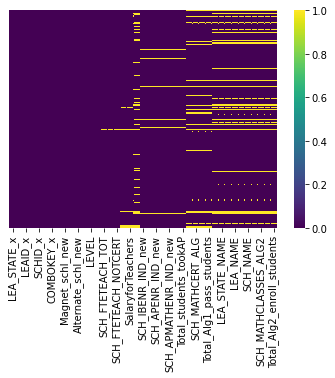

In [489]:
sns.heatmap(HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1_merged_Alg2.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [490]:
HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1_2=HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1_merged_Alg2[['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new',
       'Magnet_schl_new', 'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL','Total_enroll_students', 'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT',
       'SCH_FTETEACH_NOTCERT', 'FTE_teachers_count', 'SalaryforTeachers','Total_SAT_ACT_students', 'SCH_IBENR_IND_new', 'Total_IB_students','SCH_APENR_IND_new', 'SCH_APCOURSES', 'SCH_APMATHENR_IND_new',
       'Total_AP_math_students', 'Total_students_tookAP','SCH_MATHCLASSES_ALG', 'SCH_MATHCERT_ALG', 'Total_Alg1_enroll_students','Total_Alg1_pass_students',
        'SCH_MATHCLASSES_ALG2','SCH_MATHCERT_ALG2', 'Total_Alg2_enroll_students']]

In [491]:
HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1_2.shape

(20685, 34)

##### Merging with Calculus

In [492]:
HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1_2_merged_Cal= pandas.merge(left=HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1_2,right=Calculus_clean, how='left', left_on='NCESSCH', right_on='NCESSCH')
HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1_2_merged_Cal.shape

(20685, 44)

In [493]:
HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1_2_merged_Cal.columns

Index(['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new', 'Magnet_schl_new',
       'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL',
       'Total_enroll_students', 'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT',
       'SCH_FTETEACH_NOTCERT', 'FTE_teachers_count', 'SalaryforTeachers',
       'Total_SAT_ACT_students', 'SCH_IBENR_IND_new', 'Total_IB_students',
       'SCH_APENR_IND_new', 'SCH_APCOURSES', 'SCH_APMATHENR_IND_new',
       'Total_AP_math_students', 'Total_students_tookAP',
       'SCH_MATHCLASSES_ALG', 'SCH_MATHCERT_ALG', 'Total_Alg1_enroll_students',
       'Total_Alg1_pass_students', 'SCH_MATHCLASSES_ALG2', 'SCH_MATHCERT_ALG2',
       'Total_Alg2_enroll_students', ' "LEA_STATE"', 'LEA_STATE_NAME', 'LEAID',
       'LEA_NAME', 'SCHID', 'SCH_NAME', 'COMBOKEY', 'SCH_MATHCLASSES_CALC',
       'SCH_MATHCERT_CALC', 'Total_Calc_enroll_students'],
      dtype='object')

In [494]:
HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1_2_Cal=HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1_2_merged_Cal[['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new',
       'Magnet_schl_new', 'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL','Total_enroll_students', 'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT',
       'SCH_FTETEACH_NOTCERT', 'FTE_teachers_count', 'SalaryforTeachers','Total_SAT_ACT_students', 'SCH_IBENR_IND_new', 'Total_IB_students','SCH_APENR_IND_new', 'SCH_APCOURSES', 'SCH_APMATHENR_IND_new',
       'Total_AP_math_students', 'Total_students_tookAP','SCH_MATHCLASSES_ALG', 'SCH_MATHCERT_ALG', 'Total_Alg1_enroll_students','Total_Alg1_pass_students',
        'SCH_MATHCLASSES_ALG2','SCH_MATHCERT_ALG2', 'Total_Alg2_enroll_students','SCH_MATHCLASSES_CALC','SCH_MATHCERT_CALC', 'Total_Calc_enroll_students']]

In [495]:
HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1_2_Cal.shape

(20685, 37)

##### Merging with Geometry

In [496]:
HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1_2_Cal_merged_Geo= pandas.merge(left=HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1_2_Cal,right=Geometry_clean, how='left', left_on='NCESSCH', right_on='NCESSCH')
HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1_2_Cal_merged_Geo.shape

(20685, 47)

In [497]:
HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1_2_Cal_merged_Geo.columns

Index(['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new', 'Magnet_schl_new',
       'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL',
       'Total_enroll_students', 'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT',
       'SCH_FTETEACH_NOTCERT', 'FTE_teachers_count', 'SalaryforTeachers',
       'Total_SAT_ACT_students', 'SCH_IBENR_IND_new', 'Total_IB_students',
       'SCH_APENR_IND_new', 'SCH_APCOURSES', 'SCH_APMATHENR_IND_new',
       'Total_AP_math_students', 'Total_students_tookAP',
       'SCH_MATHCLASSES_ALG', 'SCH_MATHCERT_ALG', 'Total_Alg1_enroll_students',
       'Total_Alg1_pass_students', 'SCH_MATHCLASSES_ALG2', 'SCH_MATHCERT_ALG2',
       'Total_Alg2_enroll_students', 'SCH_MATHCLASSES_CALC',
       'SCH_MATHCERT_CALC', 'Total_Calc_enroll_students', 'LEA_STATE',
       'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME', 'COMBOKEY',
       'SCH_MATHCERT_GEOM', 'SCH_MATHCLASSES_GEOM',
   

In [498]:
HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1_2_Cal_Geo=HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1_2_Cal_merged_Geo[['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new',
       'Magnet_schl_new', 'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL','Total_enroll_students', 'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT',
       'SCH_FTETEACH_NOTCERT', 'FTE_teachers_count', 'SalaryforTeachers','Total_SAT_ACT_students', 'SCH_IBENR_IND_new', 'Total_IB_students','SCH_APENR_IND_new', 'SCH_APCOURSES', 'SCH_APMATHENR_IND_new',
       'Total_AP_math_students', 'Total_students_tookAP','SCH_MATHCLASSES_ALG', 'SCH_MATHCERT_ALG', 'Total_Alg1_enroll_students','Total_Alg1_pass_students',
        'SCH_MATHCLASSES_ALG2','SCH_MATHCERT_ALG2', 'Total_Alg2_enroll_students','SCH_MATHCLASSES_CALC','SCH_MATHCERT_CALC', 'Total_Calc_enroll_students','SCH_MATHCERT_GEOM', 'SCH_MATHCLASSES_GEOM',
       'Total_Geomty_enroll_students']]

In [499]:
HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1_2_Cal_Geo.shape

(20685, 40)

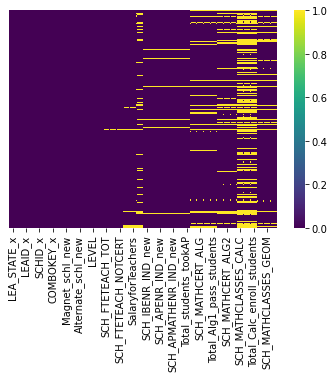

In [500]:
sns.heatmap(HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1_2_Cal_Geo.isnull(),yticklabels=False,cbar=True,cmap='viridis')

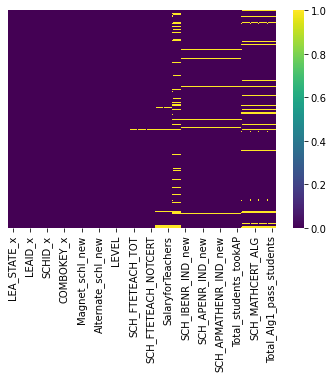

In [501]:
sns.heatmap(HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [502]:
null_columns=HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1.columns[HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1.isnull().any()]
HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1[null_columns].isnull().sum()

Total_enroll_students            1
SCH_FTETEACH_TOT               269
SCH_FTETEACH_CERT              269
SCH_FTETEACH_NOTCERT           269
FTE_teachers_count             773
SalaryforTeachers              773
Total_SAT_ACT_students        3137
SCH_IBENR_IND_new              402
Total_IB_students              402
SCH_APENR_IND_new              404
SCH_APCOURSES                  404
SCH_APMATHENR_IND_new          404
Total_AP_math_students         404
Total_students_tookAP          404
SCH_MATHCLASSES_ALG           2056
SCH_MATHCERT_ALG              2056
Total_Alg1_enroll_students    2056
Total_Alg1_pass_students      2056
dtype: int64

In [503]:
crdc_master_math = HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1.dropna(axis = 0, how ='any') 

In [504]:
print("Old data frame length:", len(HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1)) 
print("New data frame length:", len(crdc_master_math))  
print("Number of rows with at least 1 NA value: ", 
      (len(HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1)-len(crdc_master_math))) 

Old data frame length: 20685
New data frame length: 16336
Number of rows with at least 1 NA value:  4349


In [505]:
crdc_master_math.shape

(16336, 31)

In [506]:
crdc_master_math.dtypes

LEA_STATE_x                    object
LEA_STATE_NAME_x               object
LEAID_x                        object
LEA_NAME_x                     object
SCHID_x                        object
SCH_NAME_x                     object
COMBOKEY_x                     object
Special_ed_schl_new             int64
Magnet_schl_new                 int64
Charter_Schl_new                int64
Alternate_schl_new              int64
NCESSCH                        object
LEVEL                          object
Total_enroll_students         float64
SCH_FTETEACH_TOT              float64
SCH_FTETEACH_CERT             float64
SCH_FTETEACH_NOTCERT          float64
FTE_teachers_count            float64
SalaryforTeachers             float64
Total_SAT_ACT_students        float64
SCH_IBENR_IND_new             float64
Total_IB_students             float64
SCH_APENR_IND_new             float64
SCH_APCOURSES                 float64
SCH_APMATHENR_IND_new         float64
Total_AP_math_students        float64
Total_studen

In [507]:
crdc_master_math.to_csv (r'/Users/dansari/Documents/GitHub/Identifying-features-to-predict-high-school-assessment-proficiency/Phase1/Data/CRDC/Clean_crdc_master_math.csv', index = False,header=True)